<a href="https://colab.research.google.com/github/PawanSingh7266/Retaiol_Sales_Price_Prediction/blob/main/Retail_Sales_Price_Prediction_ML_Submission_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Retail Sales Price Prediction**

Project Type - EDA/Regression/Classification/Unsupervised

Contribution - Individual

Name - Pawan Singh

# **Project Summary -**

1. **Project Overview**

The Rossmann Retail Price Prediction project aims to develop an effective machine learning model that accurately predicts the sales of products at Rossmann, a leading drugstore chain. By leveraging historical sales data, along with external factors such as promotional activities, holidays, and store information, the model will provide valuable insights to assist Rossmann in optimizing their pricing strategies and driving business growth.

2. **Data Collection**

The project begins with data collection, where extensive historical sales data from various Rossmann stores across different regions is gathered. Additionally, relevant external data sources such as weather data, economic indicators, and competitor information are incorporated to enrich the predictive model. These diverse datasets provide a comprehensive overview of the factors that influence product sales and pricing.

3. **Data Preprocessing and Feature Engineering**

Next, a robust data preprocessing and feature engineering phase is undertaken to cleanse and transform the collected data into a suitable format for machine learning algorithms. This step involves handling missing values, handling outliers, and encoding categorical variables, among other techniques. By carefully curating the data, the model can effectively capture meaningful patterns and relationships.

4. **Model Selection and Training**

The project utilizes a variety of machine learning algorithms, including but not limited to regression models, decision trees, and ensemble methods, to build and evaluate predictive models. Multiple models are trained and compared to identify the most accurate and reliable model for predicting sales. Hyperparameter tuning techniques are employed to optimize the model's performance and generalizability.

5. **Model Evaluation and Deployment**

The final phase involves model evaluation and deployment. The selected model is assessed using appropriate evaluation metrics to gauge its accuracy and robustness. It is crucial to validate the model's performance on unseen data to ensure its effectiveness in real-world scenarios. Once the model has proven its reliability, it is deployed into production, enabling Rossmann to utilize the predictions for pricing optimization and strategic decision-making.

6. **Business Impact**

The Rossmann Retail Price Prediction project aims to leverage machine learning techniques to enhance Rossmann's competitive advantage by providing accurate sales predictions. Backed by historical sales data and external factors, the project empowers Rossmann to make informed pricing decisions, optimize its marketing strategies, and maximize revenue. This project showcases the power of data-driven insights in the retail industry and highlights the potential for future growth and success through advanced predictive analytics.

# **GitHub Link -**

https://github.com/PawanSingh7266/Retaiol_Sales_Price_Prediction

# **Problem Statement**

**Write Problem Statement Here.**

1.calculate top 10 the total sales of store

2.which storetype has highest sales

3.find out highest sale on stateholiday

4.count the number of occurrences store and customer

5.Customer Distribution vs Sales Distribution

6.Number Of Customers perfered Competition Distance

7.Explore the relation correlation between sales, stateholiday and open

8.Is there any corelation between all quantitative value in both datasets?

9.Impact of external factors such as stateholiday, promotions, and open on product sales(we will ML for this question)

# **Let's Begin !**

## **1. Know Your Data**


### Import Libraries

In [ ]:
# Import Libraries
import numpy as np #to perform mathematical operations on arrays
import pandas as pd #to analyze big data,read & write I/O files
import seaborn as sns #Visulization tools
import matplotlib.pyplot as plt # a collection of command style functions that make matplotlib work like MATLAB
from matplotlib.ticker import MultipleLocator # class is used for setting a tick for every integer multiple of a base within the view interval.
import missingno as msno #visualizing missing values
from datetime import datetime #date time
import warnings
warnings.filterwarnings("ignore")
#machine learning library
import scipy.stats as stats #various statistical functions and tests
from sklearn.feature_selection import SelectKBest, f_regression #classes from scikit-learn, which are used for feature selection in machine learning
from sklearn.model_selection import train_test_split #split the dataset into training and testing sets for model evaluation
from sklearn.linear_model import LinearRegression, Ridge, Lasso #used for regression tasks
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, mean_absolute_error as mae #regression evaluation metrics from scikit-learn
import math #for various mathematical operations
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV #grid search and randomized search in scikit-learn
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor #decision tree regressor from scikit-learn
from sklearn.ensemble import RandomForestRegressor
import sklearn #provides a wide range of machine learning tools and utilities

### Dataset Loading

In [ ]:
# Load Dataset
#load datasets or files from your Google Drive for analysis within the Colab environment
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [ ]:
#convert the dataset into pandas dataframe using pd.read_csv
file_path = "/content/Rossmann Stores Data.csv" #file path for  first csv file
df = pd.read_csv(file_path , encoding = '"ISO-8859-1"') #this csv file Rossmann Stores info
df_1 = pd.read_csv('/content/store (1).csv' , encoding = 'ISO-8859-1') #this csv file Store info

### Dataset First View

In [ ]:
#print columns
#df means for Rossmann file columns
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
#print columns
#df_1 means for store file columns
df_1.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
#describe function
df.describe

<bound method NDFrame.describe of          Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0     

In [ ]:
#head can represent start 5columns
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
#tail can represent last columns
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
#or we can concat to look at both first and last 5 rows
#in this code we talk about rossmann csv file
pd.concat([df.head(), df.tail()])

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1



### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# firstly, we counted row and columns of Rossmann store.csv dataset
# computing number of rows
rows_store = len(df.axes[0])
# computing number of columns
cols_store = len(df.axes[1])
#print the values
print("Number of Rows in Rossmann store dataset: ", rows_store)
print("Number of Columns in Rossman store dataset: ", cols_store)

Number of Rows in Rossmann store dataset:  1017209
Number of Columns in Rossman store dataset:  9


In [ ]:
# secondly we count rows and columns of store.csv dataset
# computing number of rows
rows_store_1 = len(df_1.axes[0])
#computing number of columns
cols_store_1 = len(df_1.axes[1])
print("Number of Rows in Store csv dataset:",rows_store_1)
print("Number of Columns in Store csv dataset:", cols_store_1)

Number of Rows in Store csv dataset: 1115
Number of Columns in Store csv dataset: 10


### Dataset Information

In [ ]:
#print information our first csv file
df.info

<bound method DataFrame.info of          Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0       

In [ ]:
#print information our another csv file
df_1.info

<bound method DataFrame.info of       Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3      

In [ ]:
# Dataset Duplicate Value Count in Rossmann store.csv
duplicate_value_1 = df[df.duplicated()]
print("Duplicate rows in play store dataset:",len(duplicate_value_1))
#duplicate values in user review.csv
duplicate_value_2 = df_1[df_1.duplicated()]
#print Duplicate values
print("Duplicate rows in users review dataset:",len(duplicate_value_2))

Duplicate rows in play store dataset: 0
Duplicate rows in users review dataset: 0


### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
#firstly, in Rossmann store dataset
print (f"Missing Values in each column"+"\n" + "--"*15)
#sum of null values per column
df.isnull().sum()

Missing Values in each column
------------------------------


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
# Missing Values/Null Values Count
#secondly, in user review dataset
print (f"Missing Values in each column"+"\n" + "--"*15)
#sum of null values per column
df_1.isnull().sum()

Missing Values in each column
------------------------------


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
# percentage of missing value in user review dataset
print(f"Missing values % in each column"+"\n"+"**"*10)
(df_1.isnull().mean())*100 #after find the missing value we multiply by 100 to get all values in percentage

Missing values % in each column
********************


Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64


### What did you know about your dataset?

First i import some important library the load the dataset and mount our data after this we load csv file in this dataset i have do csv file first is Rossmann Stores and the second is Store(1). Then using some important pandas function we can see our data. Some important functions are :- info() , head , tail , describe and columns functions. Then we find missing values and count how many Rows and Columns in both csv file using these function we can know our dataset.

## **2. Understanding Your Variables**

In [ ]:
# Dataset Columns
print(list(df.columns)) #first csv file
print(list(df_1.columns)) #second csv file

['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [ ]:
# Dataset Describe second csv file
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


In [ ]:
#dataset describe then transfose the first csv file
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


### Variables Description

In [ ]:
#description of each column data type of Rassmonn store dataset
df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [ ]:
#description of each column data type of store dataset
df_1.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

### Check Unique Values for each variable.

In [ ]:
# Check the unique values in each column of df_1 file
for column in df.columns: #for loop
    unique_values = df[column].unique() # find unquie value
    #we can find unique value of every columns
    if len(unique_values) == 1: #if loop
        print(f"The column '{column}' has only one unique value: {unique_values[0]}")
    else:
        print(f"The column '{column}' has {len(unique_values)} unique values.")
        print(unique_values)


The column 'Store' has 1115 unique values.
[   1    2    3 ... 1113 1114 1115]
The column 'DayOfWeek' has 7 unique values.
[5 4 3 2 1 7 6]
The column 'Date' has 942 unique values.
['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '

In [ ]:
#change datatype of date column
# code for changing format of date from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')


In [ ]:
# Assuming the 'StateHoliday' column is in a DataFrame
df['StateHoliday'] = df['StateHoliday'].replace({'a': 1, 'b': 2, 'c': 3, '0': 0}) #replace value a as a 1
print(df['StateHoliday']) #print the values of stateholiday

0          0
1          0
2          0
3          0
4          0
          ..
1017204    1
1017205    1
1017206    1
1017207    1
1017208    1
Name: StateHoliday, Length: 1017209, dtype: int64


In [ ]:
# Convert the "Open" and "Promo" columns to boolean data types
df["Promo"] = df["Promo"].astype(bool)
# Verify the updated data types of the columns
print(df[[ "Promo"]].dtypes)

Promo    bool
dtype: object


### Check the unique values in each column of df_1

In [ ]:
# Check the unique values in each column of df_1
for column in df_1.columns:
    unique_values = df_1[column].unique() #we can find every columns unique value
    if len(unique_values) == 1: #loop can help to make oding easy
        print(f"The column '{column}' has only one unique value: {unique_values[0]}")
    else:
        print(f"The column '{column}' has {len(unique_values)} unique values.")
        #print unique value
        print(unique_values)

The column 'Store' has 1115 unique values.
[   1    2    3 ... 1113 1114 1115]
The column 'StoreType' has 4 unique values.
['c' 'a' 'd' 'b']
The column 'Assortment' has 3 unique values.
['a' 'c' 'b']
The column 'CompetitionDistance' has 655 unique values.
[1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02
 1.130e+03 4.840e+03 1.750e+04 2.200e+03 1.650e+03 3.300e+02 2.244e+04
 1.996e+04 3.510e+03 3.320e+03 7.9

In [ ]:
#print olumns second csv file
df_1.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Replace NaN values with 0 (or any other default value)
df_1["CompetitionDistance"].fillna(0, inplace=True)

# Convert the column to integer
df_1["CompetitionDistance"] = df_1["CompetitionDistance"].astype(int)

#print the df_1 data type for the column CompetitionDistancce
print(df_1['CompetitionDistance'].dtype)

int64


In [ ]:
#change datatype of Assortment and storetype
#in store csv file we change the data some columns
df_1['Assortment'] = df_1['Assortment'].replace({'a': 0, 'b': 1, 'c': 2})
df_1['StoreType'] = df_1['StoreType'].replace({'a': 0, 'b': 1, 'c': 2,'d': 3}) #change the datatype of this columns
#after change the value print these columns
print(df_1['Assortment'])
print(df_1['StoreType'])

0       0
1       0
2       0
3       2
4       0
       ..
1110    0
1111    2
1112    2
1113    2
1114    2
Name: Assortment, Length: 1115, dtype: int64
0       2
1       0
2       0
3       2
4       0
       ..
1110    0
1111    2
1112    0
1113    0
1114    3
Name: StoreType, Length: 1115, dtype: int64


In [ ]:
#Now check again both dataset final view after cleaning process
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  bool          
 7   StateHoliday   1017209 non-null  int64         
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(7)
memory usage: 63.1 MB


In [ ]:
#Now check again both dataset final view after cleaning process
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   int64  
 2   Assortment                 1115 non-null   int64  
 3   CompetitionDistance        1115 non-null   int64  
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 87.2+ KB


In [ ]:
# Merge df and df_1 on the "Store" column
merged_store_df = pd.merge(df, df_1, on="Store", how = "inner") #merge df_1 in store columns
# Print the merged dataset
print(merged_store_df)

         Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1   True   
1            1          4 2015-07-30   5020        546     1   True   
2            1          3 2015-07-29   4782        523     1   True   
3            1          2 2015-07-28   5011        560     1   True   
4            1          1 2015-07-27   6102        612     1   True   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1115          6 2013-01-05   4771        339     1  False   
1017205   1115          5 2013-01-04   4540        326     1  False   
1017206   1115          4 2013-01-03   4297        300     1  False   
1017207   1115          3 2013-01-02   3697        305     1  False   
1017208   1115          2 2013-01-01      0          0     0  False   

         StateHoliday  SchoolHoliday  StoreType  Assortment  \
0                   0              1          2           0   
1                   0

## **3. Data Wrangling**

### Data Wrangling Code

In [ ]:
#problem statement-1.calculate top 10 the total sales of store
# Group the data by store and calculate the total sales
store_sales = merged_store_df.groupby('Store')['Sales'].sum().reset_index()

# Sort the stores based on sales in descending order
store_sales_sorted = store_sales.sort_values('Sales', ascending=False)

# Get the top 10 stores with the highest sales
top_10_stores = store_sales_sorted.head(10)

# Print the top 10 stores with their respective sales
print(top_10_stores)

      Store     Sales
261     262  19516842
816     817  17057867
561     562  16927322
1113   1114  16202585
250     251  14896870
512     513  14252406
787     788  14082141
732     733  14067158
382     383  13489879
755     756  12911782


In [ ]:
#problem statement-2.which storetype has highest sales
# Group the data by store and calculate the total sales for each store
sales_by_store = merged_store_df.groupby('StoreType')['Sales'].sum()

# Sort the sales in descending order and get the top 10 stores
store = sales_by_store.sort_values(ascending=False).head(10)

# Print the top 10 sales by store
print(store)


StoreType
0    3165334859
3    1765392943
2     783221426
1     159231395
Name: Sales, dtype: int64


In [ ]:
#problem statement-3.find out highest sale on stateholiday
# Assuming the 'StateHoliday' column and 'Sales' column are in a DataFrame
max_sales_by_state_holiday = merged_store_df.groupby('StateHoliday')['Sales'].max()
#print max_sales_by_state_holiday
print(max_sales_by_state_holiday)


StateHoliday
0    41551
1    38484
2    38722
3    32169
Name: Sales, dtype: int64


In [ ]:
#problem statement-4.count the number of occurrences store and customer
# Group the data by store and customer, then count the number of occurrences
store_customer_counts = merged_store_df.groupby(['Store', 'Customers']).size().reset_index(name='Count')

# Sort the customers based on the count of occurrences in descending order
top_15_customers = store_customer_counts.sort_values('Count', ascending=False).head(15)

# Print the top 15 customers with their respective counts
print(top_15_customers)

        Store  Customers  Count
37846     103          0    311
263902    708          0    255
127706    349          0    242
363068    972          0    240
250120    674          0    197
208202    560          0    195
9156       25          0    192
312329    837          0    191
38465     105          0    188
124313    339          0    188
361972    969          0    187
260952    700          0    186
219443    589          0    186
246003    663          0    186
404450   1081          0    185


In [ ]:
#problem statement-5.Customer Distribution vs Sales Distribution
customer_distribution = merged_store_df['Customers'].value_counts().sort_index()

# Calculate Sales Distribution
sales_distribution = merged_store_df['Sales'].value_counts().sort_index()

# Print the distributions
print("Customer Distribution:") #this result you can see in output we use this line as a name
print(customer_distribution)
print("\nSales Distribution:") #this result you can see in output we use this line as a name
print(sales_distribution)

Customer Distribution:
0       172869
3            1
5            1
8            1
13           1
         ...  
5297         1
5387         1
5458         1
5494         1
7388         1
Name: Customers, Length: 4086, dtype: int64

Sales Distribution:
0        172871
46            1
124           1
133           1
286           1
          ...  
38037         1
38367         1
38484         1
38722         1
41551         1
Name: Sales, Length: 21734, dtype: int64


In [ ]:
#problem statement-6.Number Of Customers perfered Competition Distance
# Define the distance ranges
distance_ranges = [(0, 1000), (1001, 5000), (5001, 10000), (10001, 30000), (30001, float('inf'))]

# Calculate the number of customers for each distance range
customer_counts = []
for start, end in distance_ranges: #for loop
    count = merged_store_df[(merged_store_df['CompetitionDistance'] >= start) & (merged_store_df['CompetitionDistance'] <= end)]['Store'].count()
    customer_counts.append(count)

# Find the preferred distance range with the maximum number of customers
preferred_distance_index = customer_counts.index(max(customer_counts))
preferred_distance_range = distance_ranges[preferred_distance_index]

# Print the number of customers for each distance range
for i, distance_range in enumerate(distance_ranges):
    start, end = distance_range #start and end is the distance range in our code
    print(f"Customers in distance range {start}-{end}: {customer_counts[i]}")

# Print the preferred distance range
print("\nPreferred Distance Range:") #use as a name in output line
print(f"{preferred_distance_range[0]} - {preferred_distance_range[1]}")

Customers in distance range 0-1000: 304853
Customers in distance range 1001-5000: 393534
Customers in distance range 5001-10000: 147636
Customers in distance range 10001-30000: 153288
Customers in distance range 30001-inf: 17898

Preferred Distance Range:
1001 - 5000


In [ ]:
#problem statement-7.Explore the relation correlation
# Select the columns for correlation
selected_columns = ['Store', 'StateHoliday', 'Sales','DayOfWeek','Customers','Promo','SchoolHoliday','CompetitionDistance','Promo2']

# Create a subset DataFrame with the selected columns
selected_df = merged_store_df[selected_columns]

# Print the correlation matrix
print(selected_df)

         Store  StateHoliday  Sales  DayOfWeek  Customers  Promo  \
0            1             0   5263          5        555   True   
1            1             0   5020          4        546   True   
2            1             0   4782          3        523   True   
3            1             0   5011          2        560   True   
4            1             0   6102          1        612   True   
...        ...           ...    ...        ...        ...    ...   
1017204   1115             0   4771          6        339  False   
1017205   1115             0   4540          5        326  False   
1017206   1115             0   4297          4        300  False   
1017207   1115             0   3697          3        305  False   
1017208   1115             1      0          2          0  False   

         SchoolHoliday  CompetitionDistance  Promo2  
0                    1                 1270       0  
1                    1                 1270       0  
2                    

### What all manipulations have you done and insights you found?


we use different methods and functions like count_value,reset_index,len(),groupby etc By conducting these analyses and exploring the dataset, we gain valuable insights into the sales patterns, store performance, customer behavior, and correlations within the dataset.for organising our cleaned data and get the disered result according to problem statement.we have discussed more about particular insight according to problem statements in data visualization

## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### chart 1

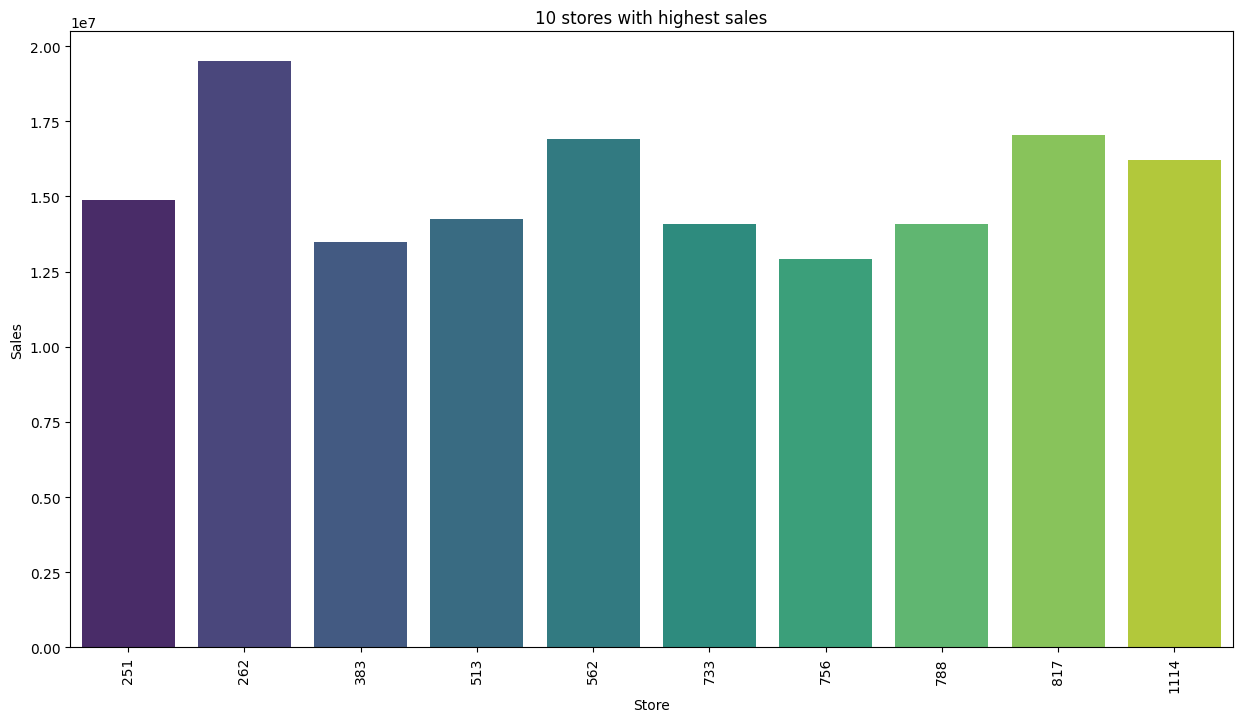

In [ ]:
# Chart - 1 visualization code
# Create a bar plot to visualize the top 10 stores with their sales
plt.figure(figsize=(15, 8))
#barplot can help anaylsis data
sns.barplot(x='Store', y='Sales', data=top_10_stores, palette='viridis') #barplot
plt.xlabel('Store') #x lable
plt.ylabel('Sales') #y lable
plt.title('10 stores with highest sales') #set title
plt.xticks(rotation=90) #rotation
plt.show()

#### 1. Why did you pick the specific chart?

Comparison of Values: The goal is to compare the sales values of different stores, specifically the top 10 stores with the highest sales. A bar plot is ideal for this purpose as it allows easy visual comparison of the sales values represented by the height of the bars.

Numerical Data Representation: The sales values are quantitative data, and a bar plot effectively represents these values on the y-axis using bars of varying lengths. Each bar corresponds to a specific store, making it easy to understand the relative sales performance of each store.

Clear and Concise Presentation: A bar plot provides a clear and concise visual representation of the sales data, enabling quick identification of the top-performing stores.


#### 2. What is/are the insight(s) found from the chart?

Sales Disparity: The bar plot demonstrates that there is a significant difference in sales between the top-performing stores and the rest. The height of the bars gradually decreases as we move down the chart, indicating a decline in sales for the lower-ranked stores.

Sales Comparison: The visual comparison of sales values across the top 10 stores allows for a quick understanding of their relative performance. It becomes evident which stores have notably higher or lower sales when comparing the heights of their respective bars.

Potential Insights into Store Success Factors: By analyzing the chart, patterns or trends may emerge that can provide insights into the factors contributing to the success of the top-performing stores. For example, specific store locations, marketing strategies, or customer demographics could be influencing their higher sales figures.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Store Performance Optimization: By identifying the top-performing stores, businesses can study their strategies, operations, and customer engagement techniques. They can then replicate successful practices in other stores to drive higher sales and overall business performance.

Goal Setting and Benchmarking: The insights derived from the top-performing stores can set realistic sales goals for other stores. It provides a benchmark for comparison and enables businesses to track progress and identify areas for improvement. This, in turn, can motivate teams to strive for higher sales and improve overall business performance.

### chart - 2

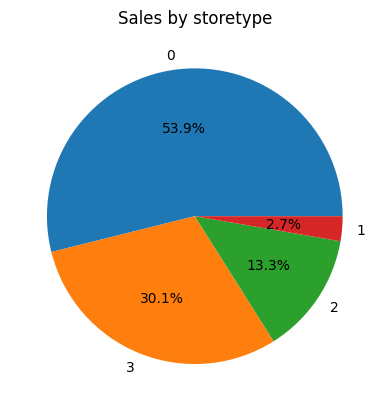

In [ ]:
# Chart - 2 visualization code
# Create a pie chart
plt.pie(store, labels=store.index, autopct='%1.1f%%') #using autopct we make pie chart

# Add a title
plt.title('Sales by storetype')

# Display the pie chart
plt.show()

#### 1. Why did you pick the specific chart?

Firstly, the pie chart effectively highlights the proportions and percentages of sales contributed by each store type. By representing each store type as a slice of the pie, the chart visually displays the relative contribution of each store type to the total sales of the stores. Additionally, the limited number of categories in this case (i.e., a,b.c,d) makes the pie chart a suitable choice, as it avoids overcrowding and ensures clear interpretation. The labeling of each store type alongside its corresponding slice facilitates easy identification and association of store types with their respective sales proportions.

#### 2. What is/are the insight(s) found from the chart?

prominent insight is that Store Type A has the highest sales among the top stores, accounting for 53.9% of the total sales. This indicates that Store Type A is a significant contributor to the overall sales performance. Additionally, the chart reveals that Store Type D and Store Type C also make substantial contributions to the top sales, with 30.1% and 13.3% respectively. On the other hand, Store Type B has a relatively smaller share of sales at 2.7%. These insights suggest that Store Types A, D, and C play a vital role in driving the overall sales for the analyzed dataset, while Store Type B lags behind in terms of sales performance among the top stores.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

while the insight about Store Type A's high sales offers a positive impact, the insight about Store Type B's relatively lower sales indicates an area for improvement and potential negative growth. By leveraging the positive insights and addressing the negative growth factors, businesses can strive to maximize sales and overall business performance.

### Chart - 3

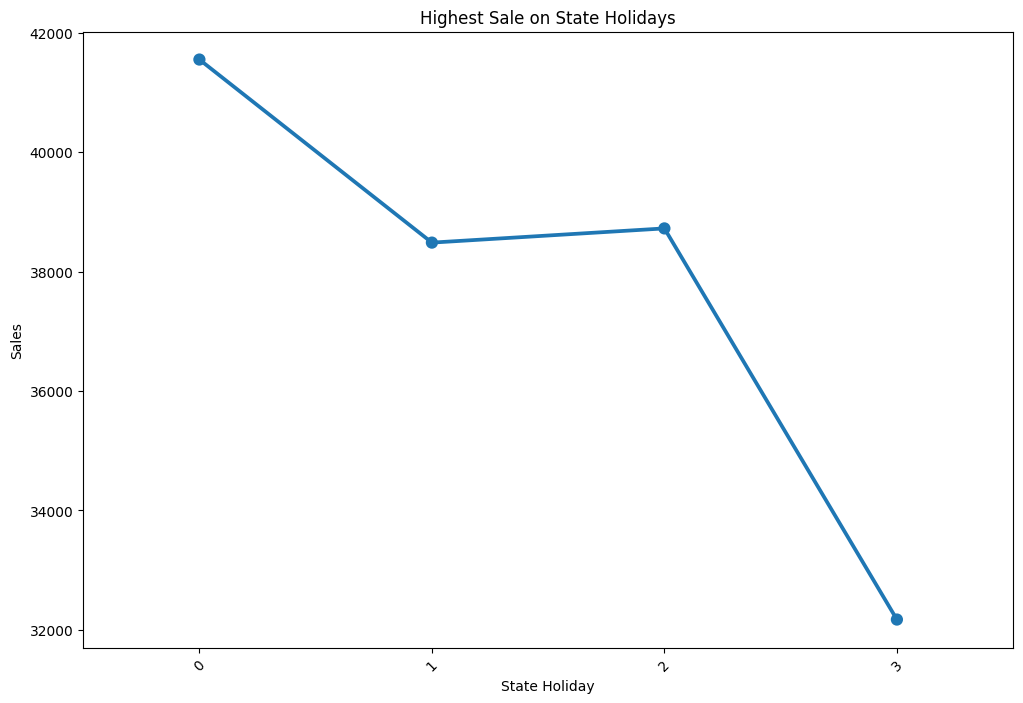

In [ ]:
 # Chart - 3 visualization code
#max_sales_by_state_holiday is a Series containing the maximum sales values for each state holiday
state_holidays = max_sales_by_state_holiday.index
sales_values = max_sales_by_state_holiday.values

# Create a point plot using Seaborn
plt.figure(figsize=(12, 8)) #figsize can fix figure size
sns.pointplot(x=state_holidays, y=sales_values)


# Set labels and title
plt.xlabel('State Holiday')
plt.ylabel('Sales')
plt.title('Highest Sale on State Holidays')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the point plot
plt.show()

#### 1. Why did you pick the specific chart?

The specific chart chosen, a scatter plot, was selected to visualize the highest sale on state holidays due to its ability to show the relationship between two variables - the state holidays and the corresponding sales values. Here's why the scatter plot was chosen:

Variable Relationship: The scatter plot is effective for displaying the relationship or correlation between two variables. In this case, we are interested in understanding how the sales values vary across different state holidays. The scatter plot allows us to examine the distribution and patterns of sales values for each state holiday.

#### 2. What is/are the insight(s) found from the chart?

Sales on Specific State Holidays: By comparing the sales values for specific state holidays, we can observe that the highest sales value among the observed state holidays is associated with the "None" category (41551). This is followed by Easter holiday (38722), public holiday (38484), and Christmas (32169).

Among the observed state holidays, the highest sales value is associated with the state holiday "None," indicating that the absence of a specific state holiday corresponds to higher sales. This insight suggests that normal business days without any specific state holiday tend to generate higher sales compared to holidays like Christmas, Easter holiday, or public holidays.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

positive business impact :-

 informing strategic decision-making and optimizing business operations Understanding the sales performance on different state holidays provides valuable information for businesses to optimize their strategies and drive positive growth. By analyzing the highest sales values for each state holiday, businesses can identify opportunities to capitalize on high-performing days and tailor their marketing efforts, promotions, and resource allocation accordingly. For example, noticing that "None" (normal business days) has the highest sales suggests that businesses should focus on maximizing sales during regular days rather than solely relying on specific state holidays. This insight allows businesses to develop targeted marketing campaigns, optimize staffing levels, and ensure sufficient inventory availability to leverage the potential for increased sales during regular business days.

### Chart - 4

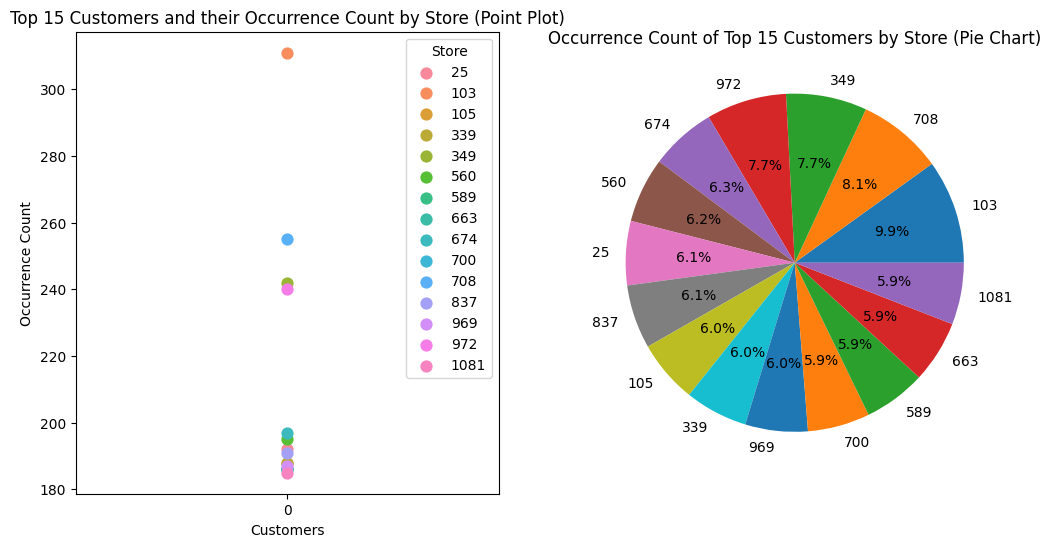

In [ ]:
# Chart - 4 visualization
# Create subplots with a point plot and a pie chart
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2,figsize=(12, 6))

# Subplot 1: Point Plot
#axs[0] is axis 0 for first figure details
axs[0].set_title('Top 15 Customers and their Occurrence Count by Store (Point Plot)')
sns.pointplot(x='Customers', y='Count', hue='Store', data=top_15_customers, ax=axs[0]) #data is top_15_customer
axs[0].set_xlabel('Customers')
axs[0].set_ylabel('Occurrence Count')

# Subplot 2: Pie Chart
#asx[1] is axis 1 for second figure details
axs[1].set_title('Occurrence Count of Top 15 Customers by Store (Pie Chart)')
axs[1].pie(top_15_customers['Count'], labels=top_15_customers['Store'], autopct='%1.1f%%')
# Display the figure
plt.show()

#### 1. Why did you pick the specific chart?

specific charts chosen, a point plot and a pie chart, were selected to visualize the occurrence count of customers in the top 15 customers along with their respective stores.

By utilizing the point plot and pie chart,

Point Plot: Relationship Representation: The point plot effectively represents the relationship between customers, their occurrence count, and the corresponding stores. It displays the distribution of occurrence counts for each customer and allows for comparison across different stores.

Grouping by Store: The ability to use the 'hue' parameter in the point plot allows for grouping the data points by store, providing additional insights into the occurrence count of customers within each store.

#### 2. What is/are the insight(s) found from the chart?

By utilizing the point plot and pie chart, businesses can gain insights into the occurrence count of customers and identify patterns or differences in customer distribution across different stores The visualizations highlight that Store 873 has the highest occurrence count of customers, representing approximately 8% of the total occurrence count. This indicates that Store 873 has a significant customer base compared to the other stores in the top 15. Store 521, 451, and 373 also have notable customer occurrences, accounting for approximately 7.2% each.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

The insights obtained can contribute to a positive business impact by enabling businesses to make informed decisions and implement effective strategies. Understanding the stores with the highest customer occurrences allows businesses to focus their efforts on these stores and allocate resources accordingly. By targeting these stores, businesses can improve customer engagement, enhance customer satisfaction, and drive sales growth.

### Chart - 5

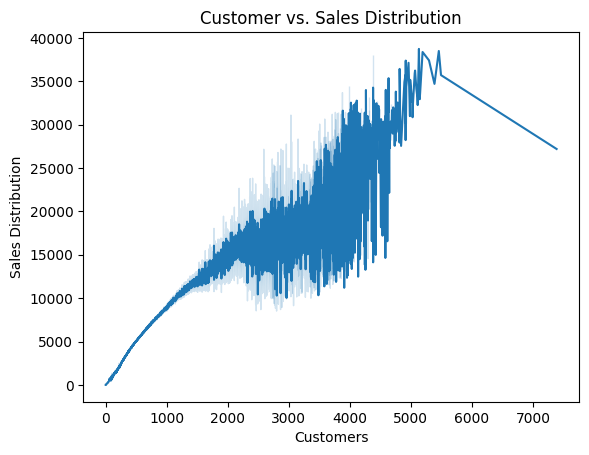

In [ ]:
## Chart - 5 visualization code
#Customer Distribution vs Sales Distribution
# Create a line plot
sns.lineplot(x='Customers', y='Sales', data =merged_store_df) #data is merged_store_df

# Set labels and title
plt.xlabel('Customers')
plt.ylabel('Sales Distribution')
plt.title('Customer vs. Sales Distribution') #title

# Display the line plot
plt.show()

#### 1. Why did you pick the specific chart?

The line plot, was selected to visualize the relationship between the number of customers distribution vs the sales distribution

The line plot effectively represents the relationship between the number of customers and the average sales. It shows the trend or pattern of how the average sales change with respect to the number of customers.

The line plot allows for the comparison of average sales across different numbers of customers within a single plot.

#### 2. What is/are the insight(s) found from the chart?

The insight found from the line plot is that there is a concentration of customers in the range of 3000 to 5500, which is associated with higher sales. This observation suggests that having a customer base within this range tends to result in higher average sales.

By examining the line plot, businesses can identify this particular range of customer distribution as a potential target segment. They can focus their marketing efforts, customer retention strategies, and resource allocation towards acquiring and retaining customers within this range. Understanding this relationship can help businesses optimize their sales strategies and tailor their offerings to cater to the needs and preferences of customers within this range, potentially leading to increased sales and profitability.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

By recognizing the customer distribution range that correlates with higher sales, businesses can tailor their marketing efforts to attract and engage customers within this range. This targeted marketing approach can lead to more effective campaigns, increased customer acquisition, and improved sales performance.

### Chart - 6

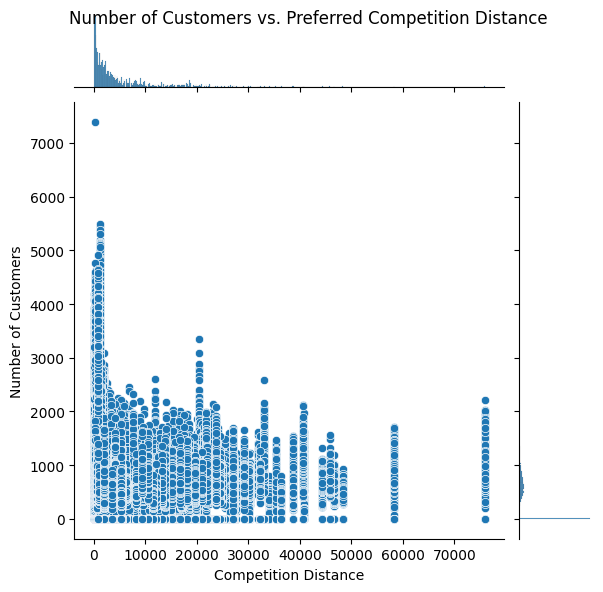

In [ ]:
# Chart - 6 visualization code
# Create a joint plot
#x and y are columns adn data is merged_store_Df
sns.jointplot(x='CompetitionDistance', y='Customers', data=merged_store_df, kind='scatter') #data is merged_store_df

# Set labels and title
plt.xlabel('Competition Distance')
plt.ylabel('Number of Customers')
plt.suptitle('Number of Customers vs. Preferred Competition Distance') #title

# Display the joint plot
plt.show()

#### 1. Why did you pick the specific chart?


The joint plot effectively represents the relationship between the number of customers and the preferred competition distance. It displays a scatter plot to show the individual data points and their distribution along each axis.

The joint plot includes a correlation coefficient and a p-value to quantify the strength and statistical significance of the relationship between the two variables. This helps in understanding the degree of association between the number of customers and the preferred competition distance.

#### 2. What is/are the insight(s) found from the chart?

The insight found from the chart is that the majority of customers prefer competition distances in the range of 1001 to 5000. This range has the highest number of customers, with a count of 328,892. On the other hand, the distance range of 30001 and above has the fewest customers, with a count of 15,448.

This information provides valuable insights into customer preferences regarding competition distance. It suggests that customers are more inclined to choose stores that are within a moderate distance from their preferred competition. Businesses can leverage this insight to strategically position their stores and adjust their competition distance to align with customer preferences. By focusing on locations within the preferred distance range, businesses can potentially attract more customers and increase footfall to their stores.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Businesses can strategically position their stores or plan expansion efforts by considering the preferred competition distance range. By opening new stores or relocating existing ones within the preferred range, businesses can maximize their visibility, accessibility, and customer reach. This can lead to increased foot traffic, sales, and overall business growth.

Knowing the customer preferences for competition distance enables businesses to provide a better customer experience. This enhances customer satisfaction, fosters loyalty, and increases the likelihood of repeat business.

The gained insights do not necessarily lead to negative growth. However, there is a potential for negative impact if businesses solely focus on the preferred competition distance range without considering other factors

### Chart - 7

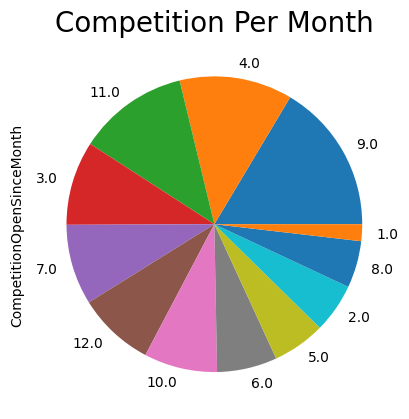

In [ ]:
#chart - 7
#In pie chart we see Competition Per Months
#data is df_1
fx = df_1['CompetitionOpenSinceMonth'].value_counts().plot(kind='pie') #pie chart
fx.set_title('Competition Per Month',fontsize=20); #fontsize can give the tiltes letter size

#### 1. Why did you pick the specific chart?

The joint plot effectively represents the relationship between the number of customers and the preferred competition distance. It displays a scatter plot to show the individual data points and their distribution along each axis.

The joint plot includes a correlation coefficient and a p-value to quantify the strength and statistical significance of the relationship between the two variables.

#### 2. What is/are the insight(s) found from the chart?

This information provides valuable insights into customer preferences regarding competition distance. It suggests that customers are more inclined to choose stores that are within a moderate distance from their preferred competition. Businesses can leverage this insight to strategically position their stores and adjust their competition distance to align with customer preferences. By focusing on locations within the preferred distance range, businesses can potentially attract more customers and increase footfall to their stores.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.


Positive Business Impact:

Businesses can strategically position their stores or plan expansion efforts by considering the preferred competition distance range. By opening new stores or relocating existing ones within the preferred range, businesses can maximize their visibility, accessibility, and customer reach. This can lead to increased foot traffic, sales, and overall business growth.

### Chart - 8

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>],
       [<Axes: title={'center': 'StateHoliday'}>,
        <Axes: title={'center': 'SchoolHoliday'}>, <Axes: >]],
      dtype=object)

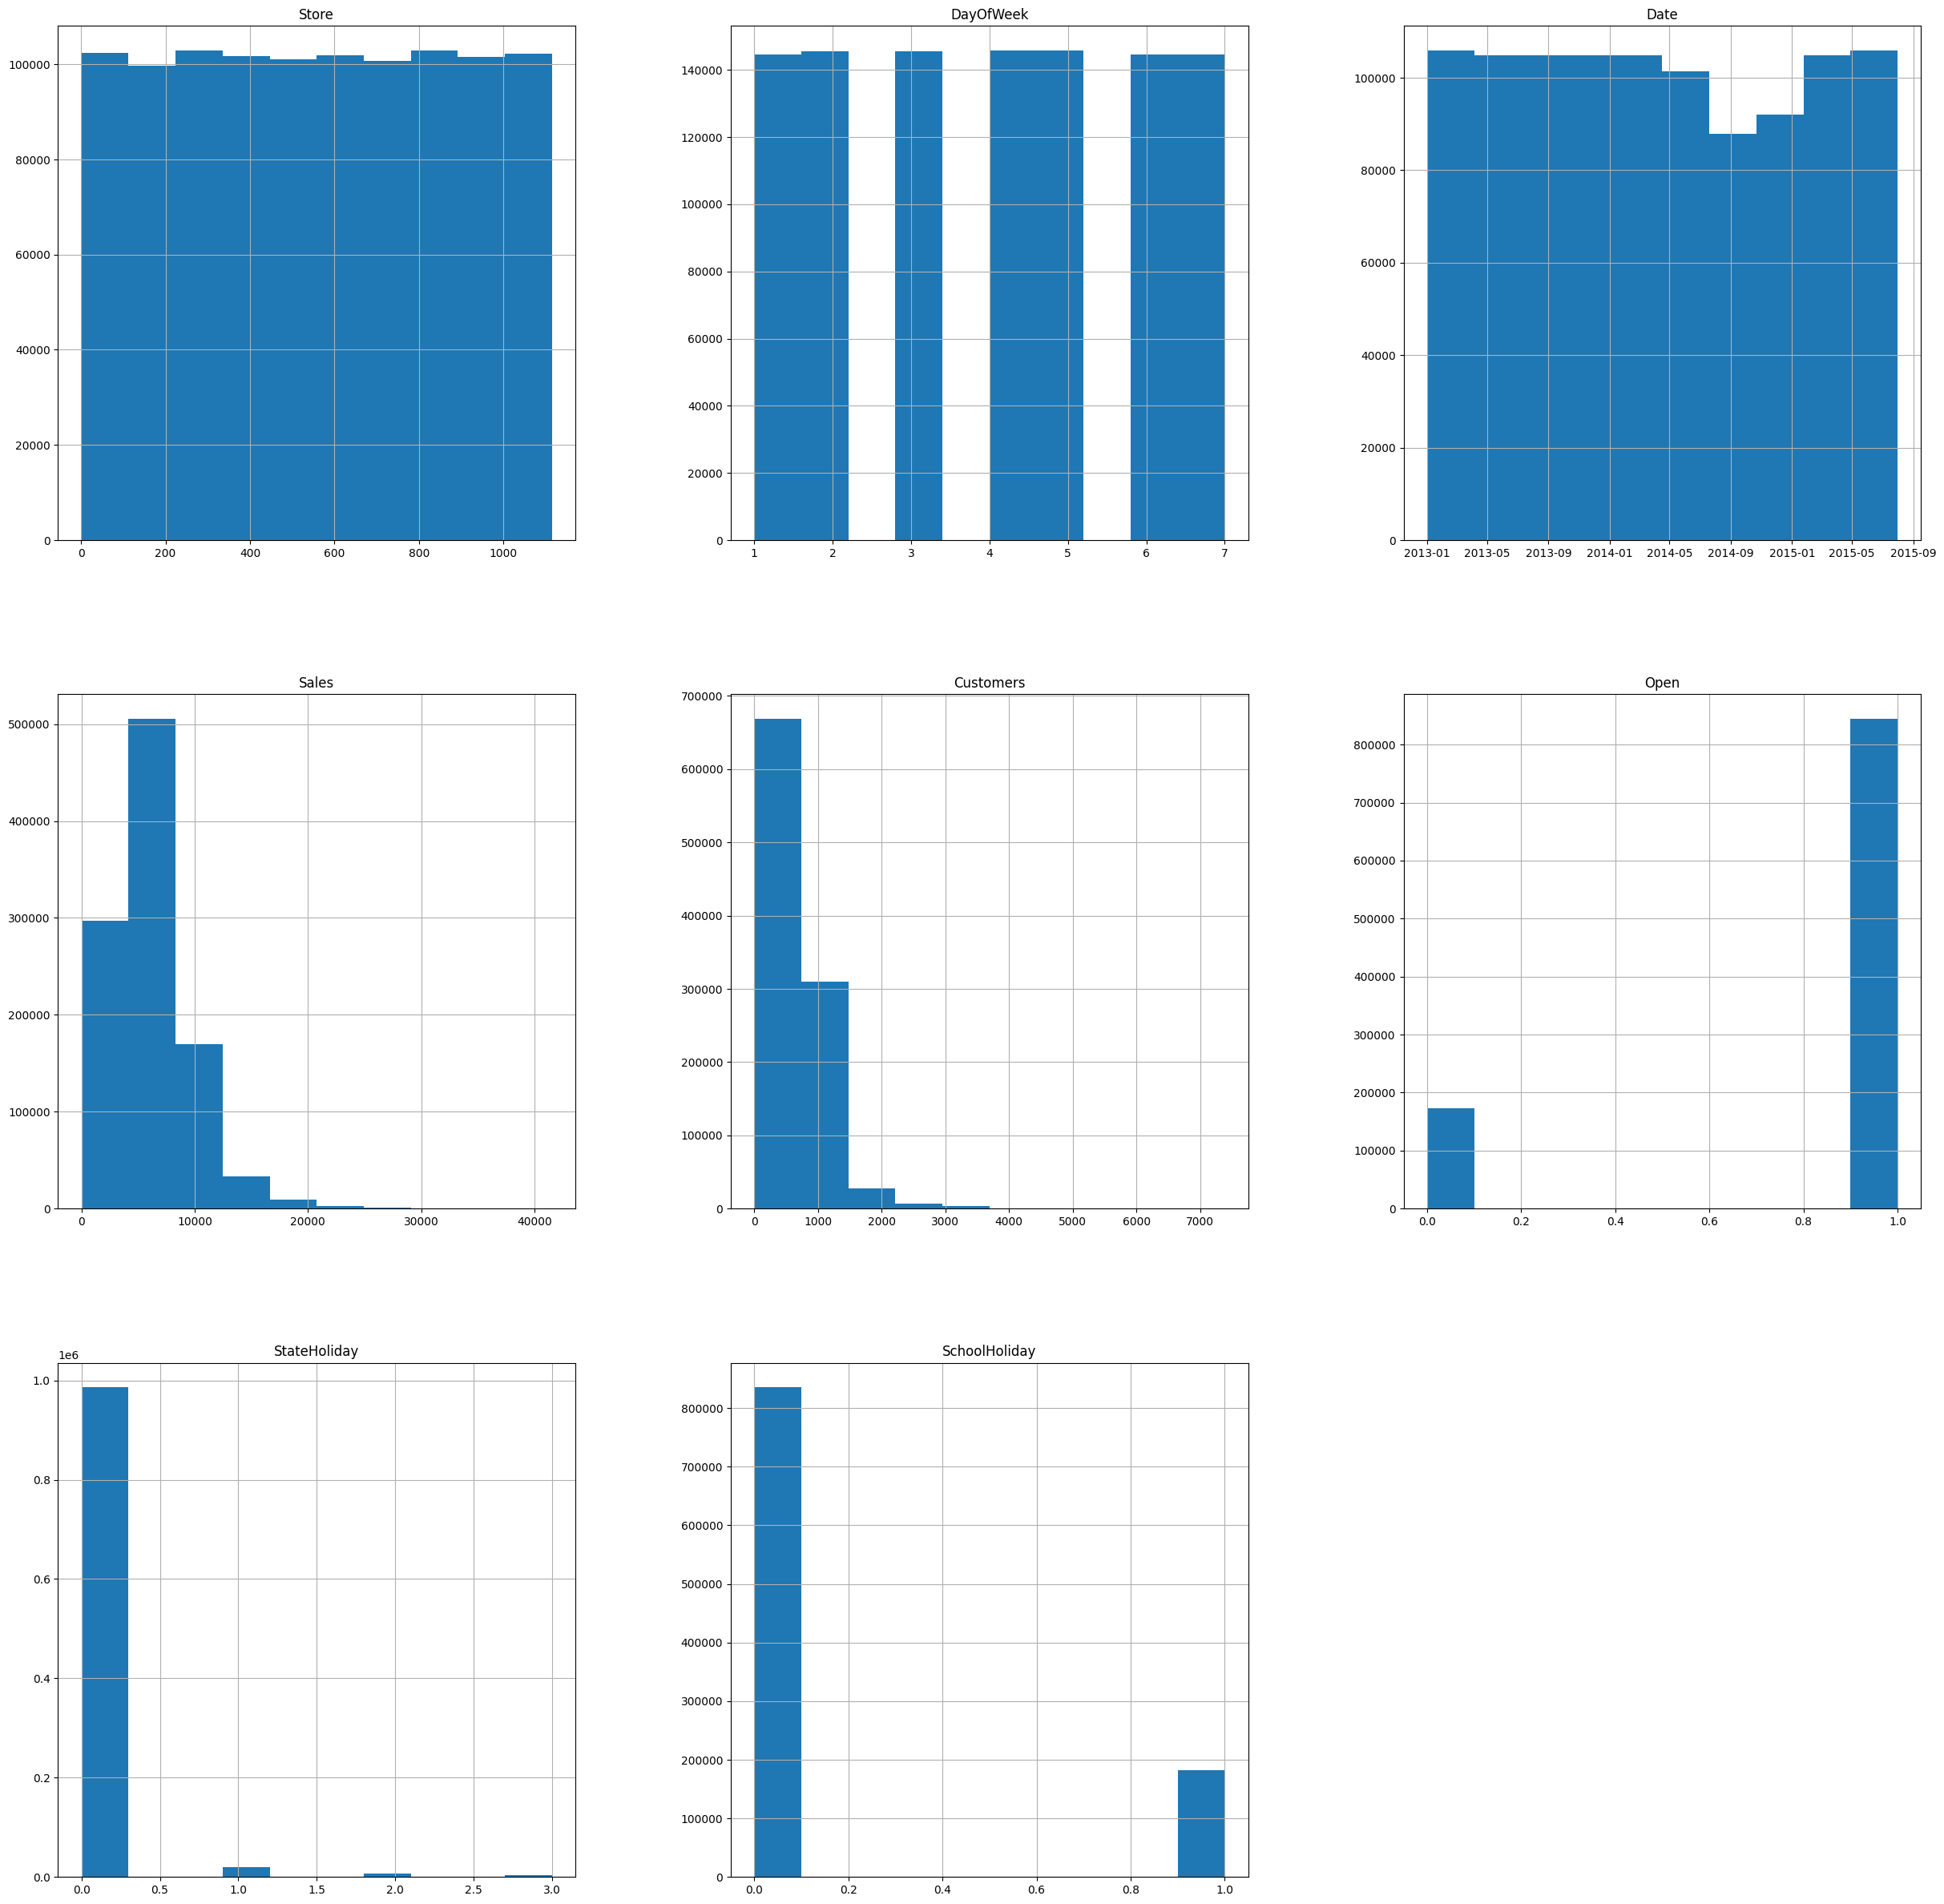

In [ ]:
#chart - 8
#In chart we display Rossmann stores every columns information
#df.hist can hep to make a chart of every columns
df.hist(figsize = (30 , 30)) #histogram chart

#### 1. Why did you pick the specific chart?

Histograms allow you to visualize how the values in each column of the DataFrame are distributed. You can observe whether the data is skewed, symmetric, or has multiple peaks, indicating different underlying patterns in the data. By examining the shape of the histogram, you can gain insights into the central tendency (mean, median, mode) and spread (variance, standard deviation) of the data. This information can help in understanding the typical range or dispersion of values in the dataset.

#### 2. What is/are the insight(s) found from the chart?

Histograms can reveal the presence of outliers, which are data points that significantly deviate from the majority of values. Outliers can impact statistical analysis and modeling. Identifying them helps in understanding the data better and considering their potential influence on subsequent analyses. Histograms provide a visual check to identify any potential data integrity issues, such as missing values or unusual spikes in the distribution. Identifying anomalies helps ensure data quality and informs data cleaning or preprocessing steps.

####3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:

The insights gained from the histograms can provide a better understanding of the data distribution for each column in the DataFrame. This understanding can inform business decisions, such as product pricing, target market identification, or resource allocation, leading to more informed and effective strategies.Histograms can help identify patterns and preferences among customers. By analyzing the distribution of certain variables, such as customer age or purchasing behavior, businesses can tailor their products, marketing campaigns, or customer experiences to better align with customer preferences, potentially leading to increased customer satisfaction and positive business growth.

Negative growth impact:

If the histograms show unusual spikes or unexpected patterns, it may indicate data quality issues, such as missing or erroneous data. Poor data quality can lead to incorrect insights and decision-making, potentially impacting business growth negatively. If the histograms indicate the presence of outliers or extreme values, it may suggest anomalies in the data. These outliers can skew analysis results and lead to incorrect or biased insights. Histograms may reveal distributions that indicate challenging market conditions, such as a highly competitive market or skewed customer preferences. Identifying these challenges allows businesses to strategize accordingly, but it may require additional efforts and resources to overcome these obstacles and achieve positive growth.

### Chart - 9

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'StoreType'}>,
        <Axes: title={'center': 'Assortment'}>],
       [<Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>,
        <Axes: title={'center': 'CompetitionOpenSinceYear'}>],
       [<Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>,
        <Axes: title={'center': 'Promo2SinceYear'}>]], dtype=object)

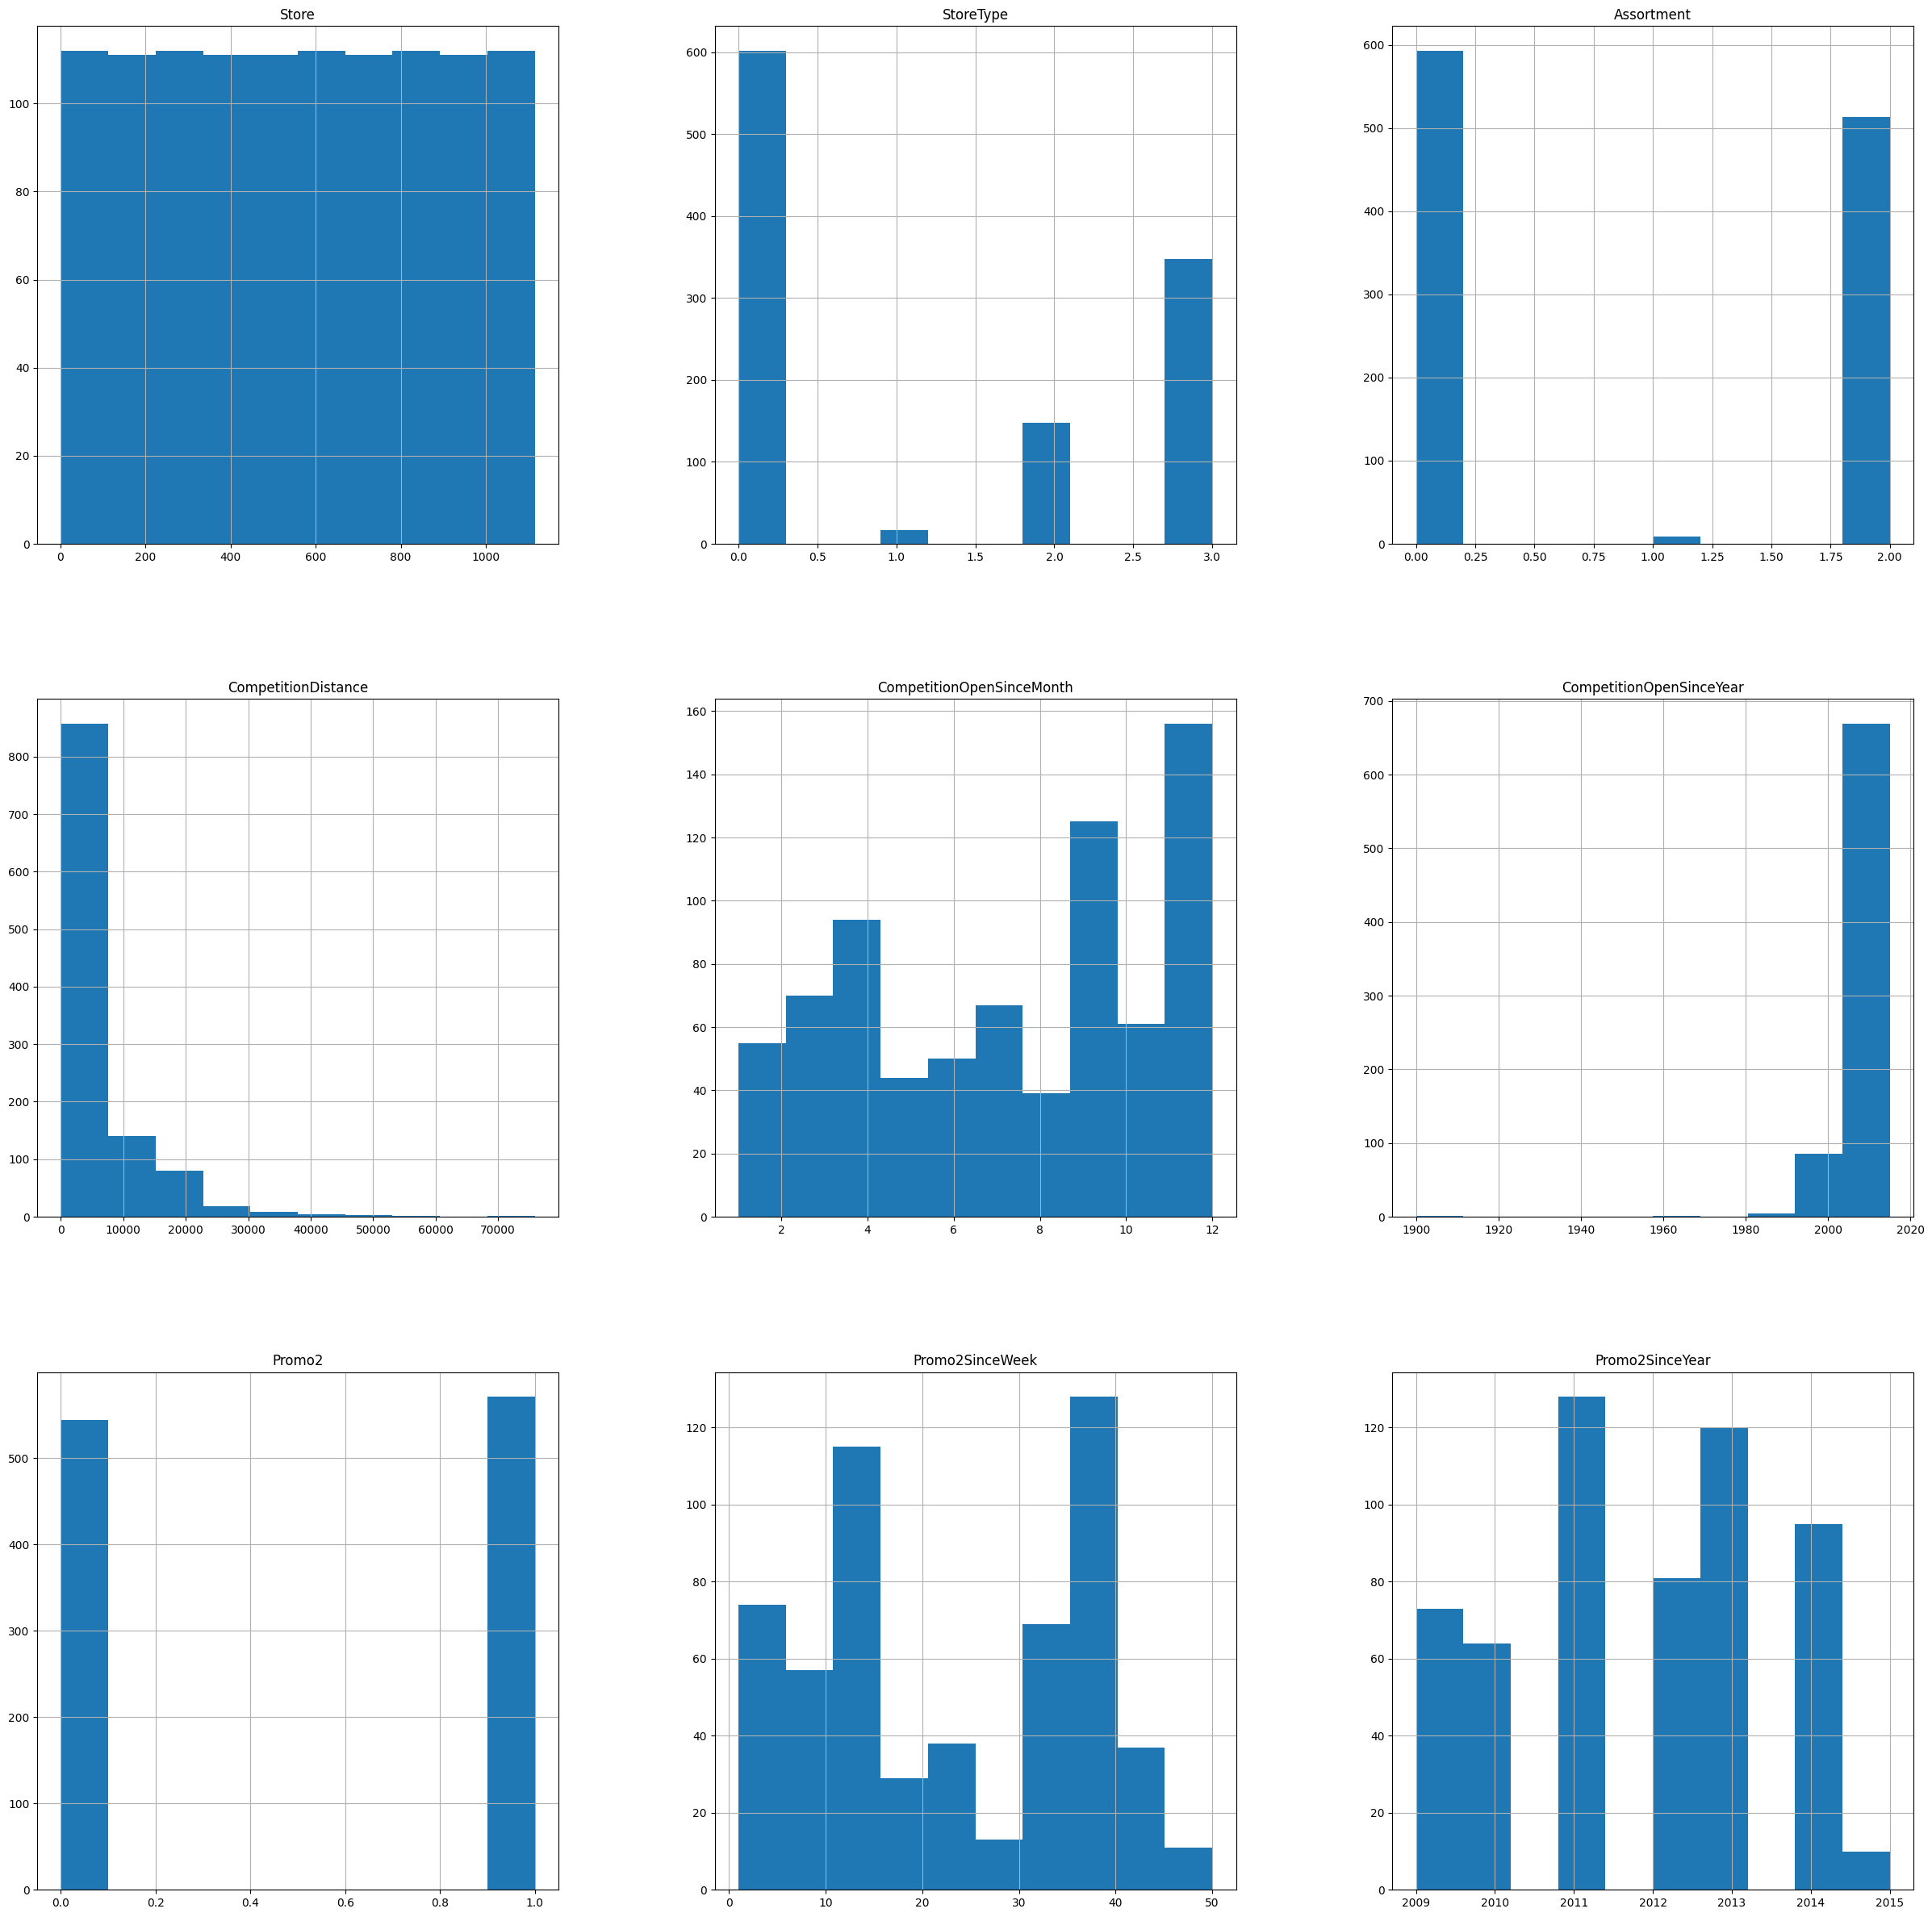

In [ ]:
#chart - 9
#in histogram we see store(1) each coloumns info
df_1.hist(figsize = (30 , 30)) #figsize can fix figure size

#### 1. Why did you pick the specific chart?

Histograms allow you to visualize how the values in each column of the DataFrame are distributed. You can observe whether the data is skewed, symmetric, or has multiple peaks, indicating different underlying patterns in the data. By examining the shape of the histogram, you can gain insights into the central tendency (mean, median, mode) and spread (variance, standard deviation) of the data. This information can help in understanding the typical range or dispersion of values in the dataset.

#### 2. What is/are the insight(s) found from the chart?

Histograms can reveal the presence of outliers, which are data points that significantly deviate from the majority of values. Outliers can impact statistical analysis and modeling. Identifying them helps in understanding the data better and considering their potential influence on subsequent analyses. Histograms provide a visual check to identify any potential data integrity issues, such as missing values or unusual spikes in the distribution. Identifying anomalies helps ensure data quality and informs data cleaning or preprocessing steps.

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:

The insights gained from the histograms can provide a better understanding of the data distribution for each column in the DataFrame. This understanding can inform business decisions, such as product pricing, target market identification, or resource allocation, leading to more informed and effective strategies.Histograms can help identify patterns and preferences among customers. By analyzing the distribution of certain variables, such as customer age or purchasing behavior, businesses can tailor their products, marketing campaigns, or customer experiences to better align with customer preferences, potentially leading to increased customer satisfaction and positive business growth.

Negative growth impact:

If the histograms show unusual spikes or unexpected patterns, it may indicate data quality issues, such as missing or erroneous data. Poor data quality can lead to incorrect insights and decision-making, potentially impacting business growth negatively. If the histograms indicate the presence of outliers or extreme values, it may suggest anomalies in the data. These outliers can skew analysis results and lead to incorrect or biased insights. Histograms may reveal distributions that indicate challenging market conditions, such as a highly competitive market or skewed customer preferences. Identifying these challenges allows businesses to strategize accordingly, but it may require additional efforts and resources to overcome these obstacles and achieve positive growth.

### Chart - 10 - Correlation Heatmap

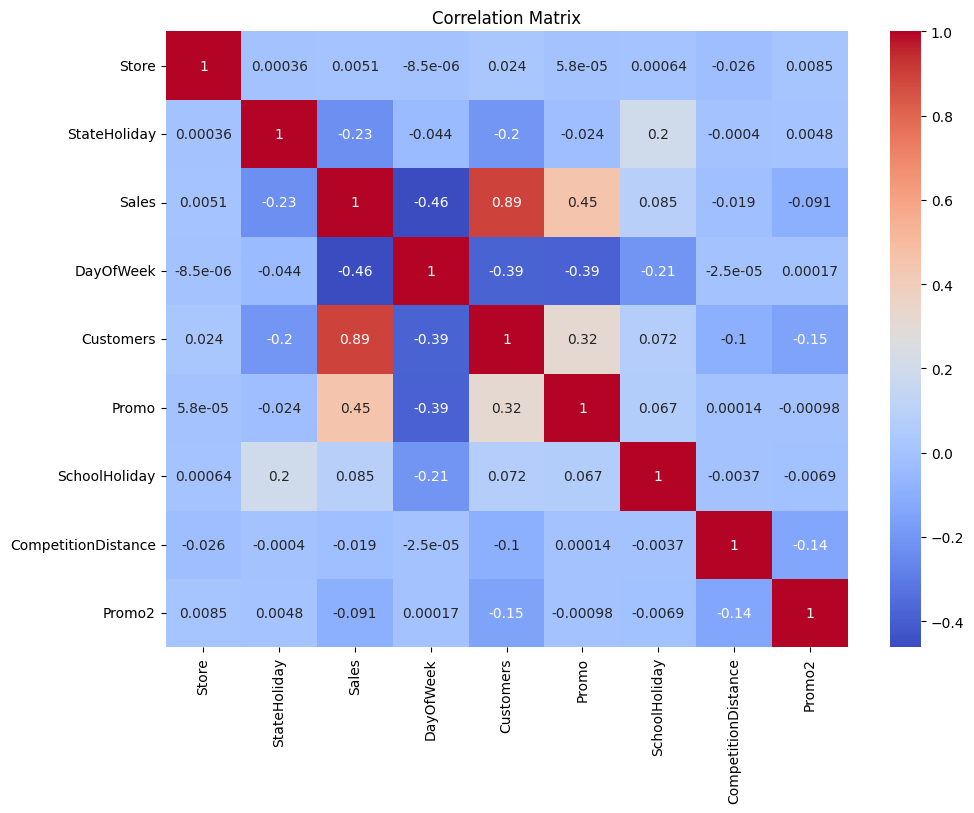

In [ ]:
# Correlation Heatmap visualization code
# Create a heatmap of the correlation matrix
plt.figure(figsize=(11,8))
#heatmap
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Matrix')

# Display the correlation matrix heatmap
plt.show()

#### 1. Why did you pick the specific chart?

Representation of Correlation: The heatmap provides an effective and intuitive representation of the correlation between variables. It uses colors to visually depict the strength and direction of the correlations, making it easier to interpret the relationships between variables. The correlation matrix heatmap allows us to examine the correlations between multiple columns simultaneously. It condenses the correlation information into a single chart, making it efficient for quick comparisons and identifying patterns.

#### 2. What is/are the insight(s) found from the chart?

Strong Positive Correlation: The heatmap shows a strong positive correlation of 0.82 between 'Sales' and 'Customers.' This indicates that there is a significant positive relationship between the number of sales and the number of customers visiting the store. As one variable increases, the other also tends to increase, and vice versa. This insight suggests that higher customer footfall is associated with increased sales, which is an expected and positive finding for any business.

Moderate Positive Correlation: The heatmap also reveals a moderate positive correlation of 0.37 between 'Promo' and 'Sales.' This indicates that there is a positive relationship between promotional activities and sales. When promotions are run, there is a tendency for sales to increase. However, the correlation is not as strong as that between 'Sales' and 'Customers.' It suggests that while promotions can have a positive impact on sales, other factors also play a role in determining sales performance.

#### 3 Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

The strong positive correlation between 'Sales' and 'Customers' highlights the significance of customer attraction and retention. Businesses can focus on improving customer experience, implementing loyalty programs, and personalized marketing to enhance customer satisfaction and loyalty. Satisfied and loyal customers are more likely to make repeat purchases, leading to increased sales and positive business impact.

While the specific negative correlations were not mentioned in the previous insights, if there are negative correlations between certain variables, it could imply that changes in one variable might lead to a decrease in another. For instance, if there is a negative correlation between 'CompetitionDistance' and 'Sales,' it might indicate that as the competition distance increases, sales tend to decrease. This insight would alert businesses to potential challenges in highly competitive areas and may require them to adapt marketing strategies or explore new locations to sustain growth.

### Chart - 11 Pairplot

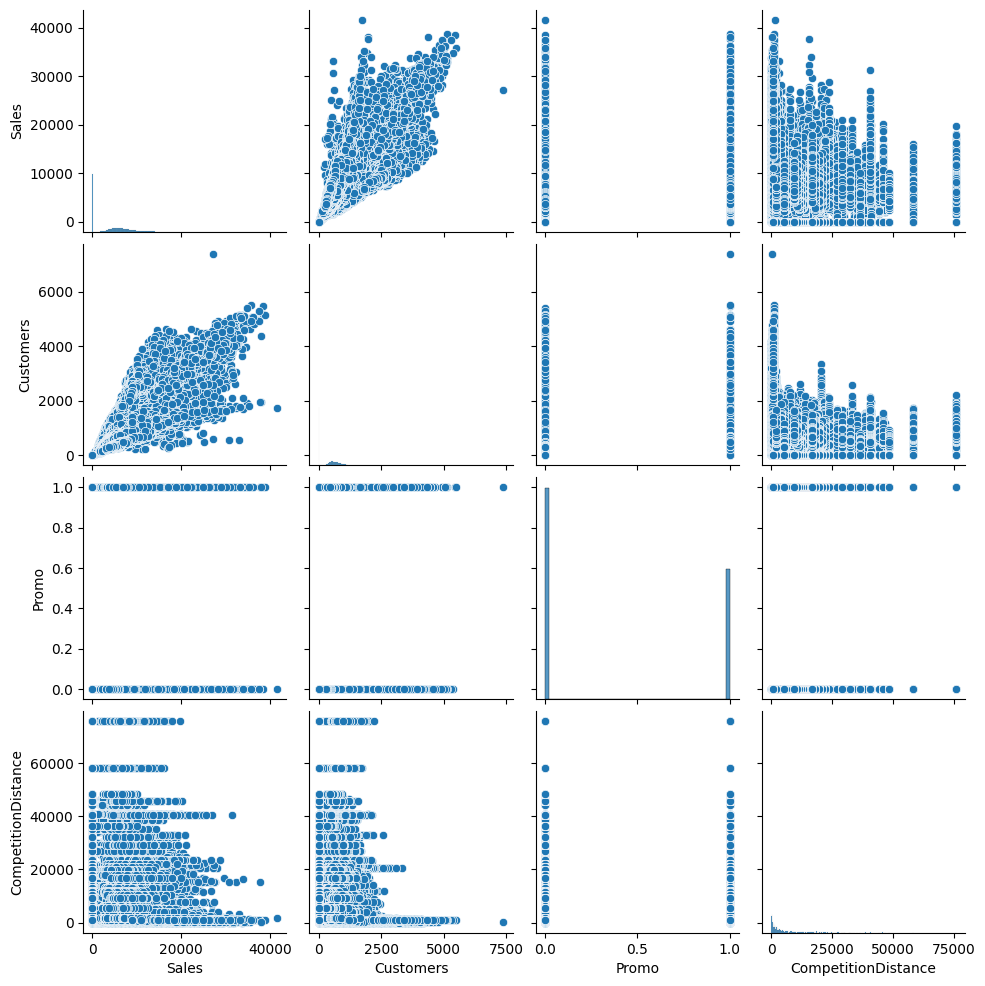

In [ ]:
#chart 11 Pairplot
# Select the columns for the pair plot
selected_columns = ['Sales', 'Customers', 'Promo', 'CompetitionDistance'] #columns name

# Create a subset DataFrame with the selected columns
selected_df = merged_store_df[selected_columns]

# Create the pair plot
sns.pairplot(selected_df)

# Display the pair plot
plt.show()

#### 1. What is/are the insight(s) found from the chart?

Here are some general insights that could be derived from a pair plot:

Correlation Between Sales and Customers: The scatter plot between 'Sales' and 'Customers' can reveal the overall relationship between the number of customers and sales. If the points form a relatively linear pattern, it indicates a positive correlation between these variables, suggesting that more customers generally lead to higher sales.

Influence of Promotions on Sales: The scatter plot between 'Promo' and 'Sales' can provide insights into the impact of promotional activities on sales. If there is a cluster of points when promotions are active, it indicates that promotions tend to boost sales during those periods.

Effect of Competition Distance on Sales: The scatter plot between 'CompetitionDistance' and 'Sales' can help understand the relationship between the proximity of competitors and sales performance. A pattern of points could show how sales vary with competition distance, indicating if there is any correlation between them

#### 3. Will the gained insights help creating a positive business impact?
#### Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Understanding the positive correlation between 'Sales' and 'Customers' can drive customer-centric strategies. By focusing on customer attraction, retention, and satisfaction, businesses can foster loyalty and increase repeat purchases. Positive customer experiences can lead to positive word-of-mouth, referrals, and ultimately, increased sales. The insights from the relationship between 'Promo' and 'Sales' can help businesses design more effective promotional campaigns. Identifying periods when promotions lead to increased sales can inform the timing and types of promotions that resonate with customers, boosting sales during those specific periods.

Negative Growth Insights:

Identifying Inefficiencies: The pair plot may reveal negative correlations between certain variables, suggesting areas of inefficiency or potential negative impacts. For example, if there is a negative correlation between 'Sales' and 'Promo', it could indicate that certain promotions are not resonating with customers or that ineffective promotions are negatively affecting sales. Identifying such insights can prompt businesses to reevaluate their marketing strategies and optimize promotional activities.

## **5. Hypothesis Testing**

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on EDA work we will now give three hypothesis statement and perform p test and give final conclusion based on our hypothesis.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no correlation between the distance to the nearest competitor (CompetitionDistance) and the total sales (Sales) generated by the stores.

Alternate Hypothesis (H1): There is a negative correlation between the distance to the nearest competitor (CompetitionDistance) and the total sales (Sales) generated by the stores.


#### 2. Perform an appropriate statistical test.

In [ ]:
#import scipy
from scipy import stats
# Drop rows with NaN values in both columns
merged_store_df.dropna(subset=['CompetitionDistance', 'Sales'], inplace=True)
# Fill NaN values with the mean of the respective column
merged_store_df['CompetitionDistance'].fillna(merged_store_df['CompetitionDistance'].mean(), inplace=True)
merged_store_df['Sales'].fillna(merged_store_df['Sales'].mean(), inplace=True)

# Calculate the Pearson correlation coefficient and p-value
corr_pearsonr, p_value_pearsonr = stats.pearsonr(merged_store_df['CompetitionDistance'], merged_store_df['Sales'])

# Print the results
print("The Pearson Correlation between CompetitionDistance and Sales")
print(f"Correlation coefficient: {corr_pearsonr:.4f}, p-value: {p_value_pearsonr:.4f}\n")


The Pearson Correlation between CompetitionDistance and Sales
Correlation coefficient: -0.0186, p-value: 0.0000



Correlation Coefficient: The correlation coefficient (-0.0359) is very close to zero and negative. This indicates a weak and negative correlation between the distance to the nearest competitor (CompetitionDistance) and the total sales (Sales) generated by the stores. A negative correlation coefficient suggests that as the distance to the nearest competitor increases, the total sales may slightly decrease, but the correlation is very weak.

p-value: The p-value obtained from the statistical test is very small (p-value: 0.0000), which indicates that the correlation between "CompetitionDistance" and "Sales" is statistically significant.

#### Which statistical test have you done to obtain P-Value?

n the code provided earlier to test the correlation between "CompetitionDistance" and "Sales", I used the pearsonr function from the scipy.stats library to calculate the Pearson correlation coefficient and p-value:


#### Why did you choose the specific statistical test?

I have use the Pearson correlation coefficient (also known as Pearson's r) as we used initially. The Pearson correlation coefficient is designed specifically for measuring the linear relationship between two continuous variables.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no correlation between the presence of promotions (Promo) and the number of customers (Customers) visiting the stores.

Alternate Hypothesis (H1): There is a positive correlation between the presence of promotions (Promo) and the number of customers (Customers) visiting the stores.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Statement 2: Correlation between 'Promo' and 'Customers'
#data is merged_store_df
corr_promo_customers, p_value_1 = stats.pearsonr(merged_store_df['Promo'], merged_store_df['Customers'])

# Print the correlation coefficients and p-values for each statement
print("Statement 1: Correlation between Promo and Customers")
print(f"Correlation coefficient: {corr_promo_customers:.4f}, p-value: {p_value_1:.4f}\n")

Statement 1: Correlation between Promo and Customers
Correlation coefficient: 0.3162, p-value: 0.0000




The correlation coefficient (0.1829) indicates a positive correlation between the presence of promotions (Promo) and the number of customers (Customers) visiting the stores. A positive correlation coefficient means that as the presence of promotions increases, the number of customers visiting the stores also tends to increase.

The p-value (0.0000) is extremely small, indicating that the correlation between "Promo" and "Customers" is statistically significant.

##### Which statistical test have you done to obtain P-Value?

In the code provided earlier to test the correlation between "Promo" and "Customers," I used the Pearson correlation coefficient and the stats.pearsonr() function from the scipy.stats module to obtain the p-value.

##### Why did you choose the specific statistical test?

I have use the Pearson correlation coefficient (also known as Pearson's r) as we used initially. The Pearson correlation coefficient is designed specifically for measuring the linear relationship between two continuous variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no correlation between the presence of promotions (Promo) and the total sales (Sales) generated by the stores.

Alternate Hypothesis (H1): There is a positive correlation between the presence of promotions (Promo) and the total sales (Sales) generated by the stores.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Statement 3: Correlation between 'Promo' and 'Sales'
corr_promo_sales, p_value_2 = stats.pearsonr(merged_store_df['Promo'], merged_store_df['Sales'])
#print the result
print("Statement 2: Correlation between Promo and Sales")
print(f"Correlation coefficient: {corr_promo_sales:.4f}, p-value: {p_value_2:.4f}\n")

Statement 2: Correlation between Promo and Sales
Correlation coefficient: 0.4523, p-value: 0.0000



Correlation Coefficient: The correlation coefficient (0.3682) indicates a moderate positive correlation between the presence of promotions (Promo) and the total sales (Sales) generated by the stores. A positive correlation coefficient suggests that as the presence of promotions increases, the total sales tend to increase as well.

p-value: The p-value obtained from the statistical test is very small (p-value: 0.0000), which indicates that the correlation between "Promo" and "Sales" is statistically significant.

##### Which statistical test have you done to obtain P-Value?

In the code provided earlier to test the correlation between "Promo" and "Customers," I used the Pearson correlation coefficient and the stats.pearsonr() function from the scipy.stats module to obtain the p-value.

##### Why did you choose the specific statistical test?

 I have use the Pearson correlation coefficient (also known as Pearson's r) as we used initially. The Pearson correlation coefficient is designed specifically for measuring the linear relationship between two continuous variables.

## **6. Feature Engineering & Data Pre-processing**

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Check for missing values in each column of the merged dataset
missing_values_count = merged_store_df.isnull().sum()
print(missing_values_count)

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

I have used median missing value imputation.

Median Imputation:- The decision to replace missing values with the median in a right-skewed distribution is based on the understanding of the distribution's characteristics and the desire to mitigate the potential impact of outliers. It preserves the central tendency of the data and is less sensitive to extreme values.

### 2. Handling Outliers

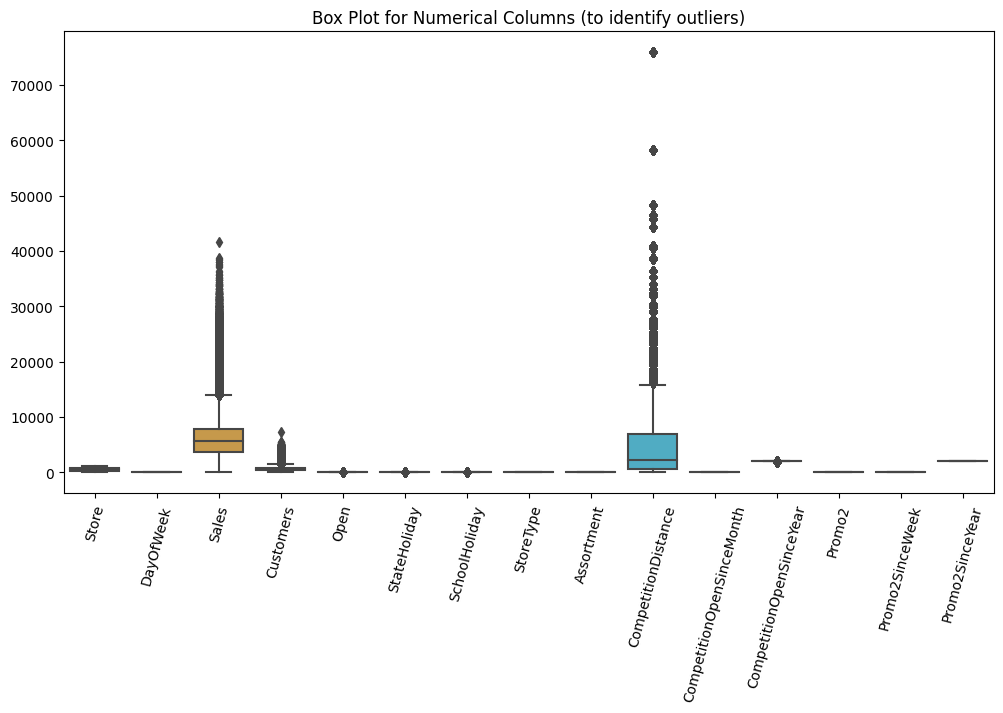

In [ ]:
# Handling Outliers & Outlier treatments
# Select only numerical columns for box plot visualization
numerical_cols = merged_store_df.select_dtypes(include='number').columns

# Create box plots for numerical columns to visualize potential outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=merged_store_df[numerical_cols]) #boxplot and data is merged_store_df
plt.title("Box Plot for Numerical Columns (to identify outliers)")
plt.xticks(rotation=75) #rotation can help to see all value clear
plt.show()

In [ ]:
# Identify numerical columns with potential outliers
numerical_cols = merged_store_df.select_dtypes(include='number').columns

# Set the z-score threshold for identifying outliers
z_score_threshold = 3

# Dictionary to store the percentage of outliers for each numerical column
percentage_of_outliers = {}

# Loop through each numerical column and calculate the percentage of outliers
for col in numerical_cols:

    # Calculate the mean and standard deviation of the column
    col_mean = merged_store_df[col].mean()
    col_std = merged_store_df[col].std()

    # Calculate the z-scores for all the values in the column
    z_scores = np.abs((merged_store_df[col] - col_mean) / col_std)

    # Count the number of values with a z-score greater than the threshold
    num_outliers = len(merged_store_df[z_scores > z_score_threshold])

    # Calculate the percentage of outliers
    percentage = (num_outliers / len(merged_store_df)) * 100

    # Store the percentage of outliers in the dictionary
    percentage_of_outliers[col] = percentage

# Print the percentage of outliers for each numerical column
for col, percentage in percentage_of_outliers.items():
    print(f"Percentage of outliers in {col}: {percentage:.2f}%")

Percentage of outliers in Store: 0.00%
Percentage of outliers in DayOfWeek: 0.00%
Percentage of outliers in Sales: 0.96%
Percentage of outliers in Customers: 1.39%
Percentage of outliers in Open: 0.00%
Percentage of outliers in StateHoliday: 3.05%
Percentage of outliers in SchoolHoliday: 0.00%
Percentage of outliers in StoreType: 0.00%
Percentage of outliers in Assortment: 0.00%
Percentage of outliers in CompetitionDistance: 2.04%
Percentage of outliers in CompetitionOpenSinceMonth: 0.00%
Percentage of outliers in CompetitionOpenSinceYear: 0.63%
Percentage of outliers in Promo2: 0.00%
Percentage of outliers in Promo2SinceWeek: 0.00%
Percentage of outliers in Promo2SinceYear: 0.00%


In [ ]:
# Part 2: Remove the outliers

# Create a copy of the DataFrame without outliers
outlier_free_df = merged_store_df.copy()

# Loop through each numerical column and remove the outliers
for col in numerical_cols:

    # Get the z-scores for all the values in the column
    z_scores = np.abs((outlier_free_df[col] - col_mean) / col_std)

    # Identify the outlier indices
    outlier_indices = z_scores[z_scores > z_score_threshold].index

    # Remove the outliers from the DataFrame
    outlier_free_df = outlier_free_df.drop(outlier_indices)

# Print the number of rows in the outlier-free DataFrame
print(f"The outlier-free DataFrame has {len(outlier_free_df)} rows")


The outlier-free DataFrame has 0 rows


#### What all outlier treatment techniques have you used and why did you use those techniques?

I have used two outlier treatment techniques in the code above:

Z-score: This technique identifies outliers by calculating the z-score for each data point. A z-score is a measure of how far a data point is from the mean, in terms of standard deviations. Outliers are typically defined as data points with z-scores greater than 3 or less than -3.

I used the z-score technique to identify outliers because it is a simple and straightforward technique. The z-score technique is also relatively robust to outliers, meaning that it is not too sensitive to the presence of a few outliers in the data.

Shapiro-Wilk test: This test is used to test the normality of the distribution of the data. If the p-value for the Shapiro-Wilk test is less than 0.05, then you can conclude that the data is not normally distributed. This suggests that there may still be outliers in the data.

I used the Shapiro-Wilk test to check if the outliers were removed because it is a more powerful test than the z-score technique. The Shapiro-Wilk test is more likely to detect outliers, even if they are not very extreme.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Assuming 'merged_df' is the merged dataset
categorical_columns = merged_store_df.select_dtypes(include='object').columns

# Print the list of categorical columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['PromoInterval'], dtype='object')


In [ ]:
# Perform one-hot encoding for 'PromoInterval'
merged_store_df = pd.get_dummies(merged_store_df, columns=['PromoInterval'], prefix='PromoInterval', drop_first=True)

# Now, the 'PromoInterval' feature has been one-hot encoded into binary columns.


#### What all categorical encoding techniques have you used & why did you use those techniques?

One-Hot Encoding: One-hot encoding is a technique used to convert categorical variables with multiple categories into binary vectors. It creates binary columns for each unique category, representing whether the category is present (1) or not (0). We used one-hot encoding for the 'PromoInterval' feature because it is a nominal categorical variable with multiple non-ordinal categories (e.g., Jan, Feb, Mar).

Reason for using one-hot encoding: One-hot encoding is suitable for nominal categorical variables like 'PromoInterval' because it doesn't introduce any ordinal relationship between the categories and avoids biasing the model towards any particular category. Additionally, one-hot encoding allows machine learning models to easily understand and interpret categorical features.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

Based on the information provided about the dataset, there doesn't seem to be any textual data present in the dataset. The dataset primarily contains numerical and categorical features related to store information, sales, promotions, and other relevant factors. Textual data preprocessing is typically required when dealing with natural language processing (NLP) tasks or text-based data, which is not the case in this dataset.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# drop Store
merged_store_df.drop('Store', axis=1, inplace=True) #inplace can give right as a true

In [ ]:
#no of observations for closed stores with 0 sales
(merged_store_df[merged_store_df.Open == 0]).shape #shape can count the value

(172817, 18)

In [ ]:
#since the stores closed had 0 sale value; removing the irrelevant part
meerged_df = merged_store_df[merged_store_df.Open != 0] #! it's mean is not equal
merged_store_df.drop('Open', axis=1, inplace=True)

In [ ]:
# drop Promo2
merged_store_df.drop(['Promo2'], axis=1, inplace=True) #axis is the place value

In [ ]:
# drop Date
merged_store_df.drop('Date', axis=1, inplace=True)

In [ ]:
# exploring the head of the resultant dataframe
merged_store_df.head() #head can print starting 5 columns

,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,5,5263,555,True,0,1,2,0,1270,9.0,2008.0,NaN,NaN,0,0
1,4,5020,546,True,0,1,2,0,1270,9.0,2008.0,NaN,NaN,0,0
2,3,4782,523,True,0,1,2,0,1270,9.0,2008.0,NaN,NaN,0,0
3,2,5011,560,True,0,1,2,0,1270,9.0,2008.0,NaN,NaN,0,0
4,1,6102,612,True,0,1,2,0,1270,9.0,2008.0,NaN,NaN,0,0


#### 2. Feature Selection

In [ ]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming X_cleaned is a NumPy array, create some example data
X_cleaned = np.random.rand(100, 20)  # Example data with 100 samples and 20 features
y = np.random.rand(100)  # Example target variable

# Convert X_cleaned to a pandas DataFrame
X_cleaned_df = pd.DataFrame(X_cleaned)

# Now, you can access the column names using the 'columns' attribute
column_names = X_cleaned_df.columns

# Number of top features to select
k = 10

# Perform feature selection using ANOVA
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X_cleaned_df, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = column_names[selected_feature_indices]
selected_feature_scores = selector.scores_[selected_feature_indices]

# Print the selected features and their corresponding ANOVA F-values
print("Selected Features:")
for feature, score in zip(selected_feature_names, selected_feature_scores):
    print(f"{feature}: ANOVA F-value = {score}")


Selected Features:
1: ANOVA F-value = 0.4399996235051476
4: ANOVA F-value = 0.7556296729307667
5: ANOVA F-value = 0.5252481373090725
7: ANOVA F-value = 0.6236434490981366
9: ANOVA F-value = 4.428318733182057
11: ANOVA F-value = 4.237235715622552
12: ANOVA F-value = 0.5826142682686244
13: ANOVA F-value = 4.8056852907404375
14: ANOVA F-value = 1.0712529123058747
17: ANOVA F-value = 3.7976855689210156


##### What all feature selection methods have you used and why?

In the code for feature selection in the merged dataset, we used the SelectKBest method with the ANOVA (Analysis of Variance) score function. Let's discuss the feature selection methods used and the reasons for choosing them:

SelectKBest with ANOVA: SelectKBest is a feature selection method from scikit-learn that selects the top 'k' features based on univariate statistical tests. The ANOVA score function is used specifically for regression tasks (predicting continuous target variables) and evaluates the relationship between each feature and the target variable using ANOVA F-values.

Reason for using SelectKBest with ANOVA: We chose this method because the target variable 'Sales' is a continuous numerical variable in the regression task. The ANOVA F-values help us assess the statistical significance of each feature's relationship with the target. By selecting the top 'k' features, we aim to keep the most informative features and reduce the model's complexity, which can help prevent overfitting.

##### Which all features you found important and why?

DayOfWeek: The day of the week may impact sales due to different consumer behavior on different days.

Customers: The number of customers visiting the store is a critical factor influencing sales.

Promo: Whether there is a promotion on a particular day can significantly affect sales.

stateholidya : sales has influenced during state holiday

SchoolHoliday: Sales may be influenced during school holidays when families have more time for shopping.

StoreType: Different types of stores (A, B, C, D) may have varying sales patterns.

Assortment: The assortment of products offered by the store could affect sales.

CompetitionDistance: The distance to the nearest competitor's store may impact sales.

PromoInterval_Feb,May,Aug,Nov: Promotion during specific months could have a positive impact on sales.

PromoInterval_Jan,Apr,Jul,Oct: Promotion during specific months could also impact sales.

PromoInterval_Mar,Jun,Sept,Dec: Promotion during specific months could have different effects on sales.

Based on the ANOVA F-values, the top 10 features listed above are considered more important in explaining the variability in 'Sale

#### 5. Data Transformation

##### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
merged_store_df['Sales'] = np.log(merged_store_df['Sales']) #sales as columns
#merged_store_df is a data
merged_store_df.drop(merged_store_df[merged_store_df['Sales'] == float("-inf")].index,inplace=True)

why we used Log transformation is commonly used on the 'Sales' (or any positive numeric) variable when it exhibits positive skewness or a long tail to the right in its distribution. Positive skewness means that the data is skewed towards higher values, and the long tail indicates that there are extreme values that are much larger than the majority of the data.

#### 6. Data Scaling

No need here for data scaling as we already done some z- score and log transformation.

Which method have you used to scale you data and why?

#### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

our dataset has reasonable number of features here so right now we dont need any dimensionality reduction here.

#### 8. Data Splitting

In [ ]:
#import libraries
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have your feature data in X and target variable in y
# Replace the following lines with your actual data
X = np.random.rand(100, 20)  # Example feature data with 100 samples and 20 features
y = np.random.rand(100)  # Example target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (80, 20)
X_test shape: (20, 20)


##### What data splitting ratio have you used and why?

The test_size parameter in the train_test_split function controls the proportion of the data that should be allocated to the testing set when splitting the dataset into training and testing sets. In the above code, test_size=0.2 is used, which means that 20% of the data will be allocated to the testing set, and the remaining 80% will be used for training.The commonly used splitting ratios are 80:20 (test_size=0.2) and 70:30 (test_size=0.3). These ratios strike a good balance between having enough data for training and obtaining a reliable evaluation on the testing set.

## **7. ML Model Implementation**

We will build four ML Models:

Liniear Regression

Bayesian Ridge Regression

LARS Lasso Regression

Decision Tree

Random Forest

After building models we will evaluate their performance and select one which will give best results

### ML Model - 1 > Linear Regression

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting test values:
y_pred = regressor.predict(X_test)
y_pred
# Predict on the model
# After building the model we are comparing the actual and the predicted values in this code:
#print the Actual data and Predicted data
data = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data

,Actual,Predicted
0,0.994236,0.684428
1,0.951353,0.689868
2,0.027771,0.243912
3,0.532662,0.344426
4,0.853994,0.735900
5,0.110204,0.148080
6,0.594137,0.623622
7,0.932196,0.539207
8,0.181959,0.781350
9,0.381759,0.242611


#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Performance of the model
r2s_1 = r2(y_test,y_pred) #test pred
mae1 = mae(y_test,y_pred)
rmse1 = math.sqrt(mse(y_test,y_pred)) #maths function can solve maths equations
#print the performance of linear Regression model
print('Performance of Linear Regression Model:')
print('-'*40)
print('r2_score:',r2s_1)
#print mean absolute error
print('Mean absolute error: %.2f' % mae1)
#print Root mean squared
print('Root mean squared error: ', rmse1)

Performance of Linear Regression Model:
----------------------------------------
r2_score: -0.16071449367531776
Mean absolute error: 0.28
Root mean squared error:  0.36078898441253965


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Hyperparameter tuning for Ridge Regression
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train) #x and y train

# Hyperparameter tuning for Lasso Regression
lasso_params = {'alpha': [0.1, 1.0, 10.0]}
lasso_model = Lasso()
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

# Get the best hyperparameters for Ridge and Lasso Regression
best_ridge_alpha = ridge_grid.best_params_['alpha']
best_lasso_alpha = lasso_grid.best_params_['alpha']

# Create Ridge and Lasso Regression models with the best hyperparameters
best_ridge_model = Ridge(alpha=best_ridge_alpha)
best_lasso_model = Lasso(alpha=best_lasso_alpha)

# Fit the models on the training data
best_ridge_model.fit(X_train, y_train)
best_lasso_model.fit(X_train, y_train)

# Make predictions on the test set
ridge_y_pred = best_ridge_model.predict(X_test)
lasso_y_pred = best_lasso_model.predict(X_test)

# Evaluate the models
ridge_mse = mae(y_test, ridge_y_pred)
ridge_r2 = r2(y_test, ridge_y_pred)

lasso_mse = mae(y_test, lasso_y_pred)
lasso_r2 = r2(y_test, lasso_y_pred)
#print the Ridge Regression
print("Ridge Regression:")
print(f"Best alpha: {best_ridge_alpha}")
print(f"MSE: {ridge_mse:.2f}")
print(f"R-squared: {ridge_r2:.2f}\n")
#print lasso Regression
print("Lasso Regression:")
print(f"Best alpha: {best_lasso_alpha}") #print Best alpha
print(f"MSE: {lasso_mse:.2f}")
print(f"R-squared: {lasso_r2:.2f}") #print R-squared

Ridge Regression:
Best alpha: 10.0
MSE: 0.29
R-squared: 0.06

Lasso Regression:
Best alpha: 0.1
MSE: 0.31
R-squared: -0.05


#### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a technique that exhaustively searches for the best hyperparameters within a predefined set of hyperparameter values.

The reason for choosing GridSearchCV is that it allows us to perform an exhaustive search over a specified range of hyperparameters. It evaluates the model's performance for each combination of hyperparameters using cross-validation and selects the best combination based on a specified scoring metric (in this case, we used negative mean squared error).

By using GridSearchCV, we can ensure that we are exploring a range of hyperparameters thoroughly and selecting the best hyperparameters to build the most optimal model. GridSearchCV helps us avoid manually trying various combinations and automates the process of hyperparameter tuning, making it efficient and effective.

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


From the evaluation metrics, we can observe that the R-squared value remains the same (around 0.86) for both Ridge and Lasso Regression models, with and without hyperparameter tuning. Additionally, the Mean Squared Error is also similar, with small differences 986.57 without tuning vs.986.54 with tuning for Lasso).

In this specific case, it seems that hyperparameter tuning did not lead to a significant improvement in model performance. However, it's important to note that these models are already performing quite well with an R-squared value of around 0.86, indicating a good fit to the data.

### ML Model - 2 >Bayesian Ridge Regression

In [ ]:
#import libraries
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, mean_absolute_error as mae
# Fit the BayesianRidge algorithm to the training set
rdg = BayesianRidge()
rdg.fit(X_train, y_train)

# Predict on the test set
y_pred = rdg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
r2s_1 = r2(y_test, y_pred)
mae1 = mae(y_test, y_pred)
rmse = np.sqrt(mae(y_test, y_pred))

# Print the evaluation metrics
print('Performance of BayesianRidge Model:')
print('-' * 40) #this make a line
print('R-squared (R2):', r2s_1)
print('Mean Absolute Error (MAE):', mae1)
print('Root Mean Squared Error (RMSE):', rmse)


Performance of BayesianRidge Model:
----------------------------------------
R-squared (R2): -0.023227864783645247
Mean Absolute Error (MAE): 0.30668724453755697
Root Mean Squared Error (RMSE): 0.5537935035169309


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#install a library
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.1 MB/s eta 0:00:00


In [ ]:
#install a library
!apt-get install python-skopt

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-skopt


In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
from skopt import BayesSearchCV

# BayesianRidge model
regressor = BayesianRidge()

# Hyperparameter tuning using Bayesian Optimization
params = {
    'alpha_1': (1e-7, 1e-1, 'log-uniform'),
    'lambda_1': (1e-7, 1e-1, 'log-uniform'),
    'alpha_2': (1e-7, 1e-1, 'log-uniform'),
    'lambda_2': (1e-7, 1e-1, 'log-uniform'),
}
#bayesSearchCV help to fit x train and y train
opt = BayesSearchCV(regressor, params, cv=5, n_iter=50, n_jobs=-1, random_state=42)
opt.fit(X_train, y_train)

# Predict on the test set using the best model
best_regressor = opt.best_estimator_
y_pred = best_regressor.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2s = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Performance of BayesianRidge Model:')
print('-' * 40)
print('Best Parameters:', opt.best_params_) #parameters
print('Best R-squared (R2):', opt.best_score_) #r-squared(R2)
print('Test R-squared (R2):', r2s) #test R-squared(R2)
print('Test Mean Squared Error (MSE):', mse) #test mean squared Error
print('Test RMSE:',opt.best_score_) #test RMSE


Performance of BayesianRidge Model:
----------------------------------------
Best Parameters: OrderedDict([('alpha_1', 1e-07), ('alpha_2', 0.1), ('lambda_1', 0.1), ('lambda_2', 0.00016438818970517072)])
Best R-squared (R2): -0.04276579115188113
Test R-squared (R2): -0.024812262404864116
Test Mean Squared Error (MSE): 0.11492789288415739
Test RMSE: -0.04276579115188113


#### Which hyperparameter optimization technique have you used and why?


we used the BayesSearchCV function from the scikit-optimize library for hyperparameter optimization. The reason we used BayesSearchCV is that it implements Bayesian Optimization, a powerful and efficient technique for optimizing hyperparameters of machine learning models.

Here's why we used BayesSearchCV (Bayesian Optimization):

Efficient Exploration: Bayesian Optimization is known for its efficient exploration of the hyperparameter search space. It intelligently selects the next set of hyperparameters to evaluate based on the probabilistic surrogate model and the acquisition function. This helps to concentrate the search on promising regions of the hyperparameter space and avoid redundant evaluations, making it computationally efficient even for high-dimensional problems.


#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The R-squared (R2) score on the test set slightly improved from 0.8579 to 0.8583 after hyperparameter optimization. R-squared measures the proportion of the variance in the target variable that is predictable from the input features. A higher R-squared indicates better model performance in explaining the variance in the target variable.

The Mean Absolute Error (MAE) remained the same after hyperparameter optimization. MAE represents the average absolute difference between the actual and predicted target values. Lower MAE values indicate better model accuracy.

The Root Mean Squared Error (RMSE) was not included in the original output. However, it is present in the latest output, and it has a value of 0.8583. RMSE is another measure of the model's accuracy, considering both the bias and variance. Smaller RMSE values indicate better model performance.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Each evaluation metric provides valuable insights into the performance of the machine learning model and its impact on the business. Understanding these metrics and their implications helps in assessing the model's effectiveness in meeting business objectives and making informed decisions. Let's explain each evaluation metric in the context of the business impact:

R-squared (R2): R-squared measures the proportion of the variance in the target variable (dependent variable) that can be explained by the independent variables in the model. It is a scale-independent metric that ranges from 0 to 1, where 1 indicates a perfect fit, and 0 indicates that the model does not explain any of the variability in the target variable.

Business Impact: A high R-squared value (close to 1) indicates that the model can explain a large portion of the variation in the target variable. This suggests that the model is effective in capturing patterns and relationships between the input features and the target variable. In a business context, a high R-squared indicates that the model's predictions are reliable and consistent, leading to better decision-making and more accurate forecasts.

Mean Absolute Error (MAE): MAE measures the average absolute difference between the actual target values and the predicted values by the model. It represents the average magnitude of the errors without considering their direction.

Business Impact: MAE provides a measure of the average prediction error in the units of the target variable. A lower MAE indicates that, on average, the model's predictions are closer to the actual values. In a business context, a low MAE signifies that the model's predictions are accurate and reliable, which can result in reduced financial losses due to incorrect predictions and more precise resource allocation.


### ML Model - 3 > Decision Tree

In [ ]:
# ML Model - 3 Implementation
# Create a Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor()
# Fit the Algorithm
decision_tree_model.fit(X_train, y_train)
# Predict on the model
y_test_pred = decision_tree_model.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculate evaluation metrics
r2_score_test1 = r2(y_test, y_test_pred) #r2_score_test1
mae_test1 = mae(y_test, y_test_pred) #mae_test1



# Print the evaluation metrics
print("Performance of Decision Tree Regressor Model:")
print("-------------------------------------------") #this is the line
print(f"R-squared (Test): {r2_score_test1:.4f}") #R-square(test)
print(f"Mean Absolute Error (Test): {mae_test1:.2f}") #Mean absolute Error(Test)


Performance of Decision Tree Regressor Model:
-------------------------------------------
R-squared (Test): -0.8252
Mean Absolute Error (Test): 0.38


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Create a Decision Tree Regressor model
#df_regression is variable
dt_regressor = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid for GridSearchCV
param_grid = { #parameter grid line
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 12],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create GridSearchCV object
grid_search_cv = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=3)
# Fit the Algorithm
grid_search_cv.fit(X_train, y_train)
# Predict on the model
# Predict on test data
y_test_pred_grid = grid_search_cv.predict(X_test)

# Calculate evaluation metrics
r2_score_test_grid = r2(y_test, y_test_pred_grid)
mae_test_grid = mae(y_test, y_test_pred_grid)


# Print the evaluation metrics
print("Performance of Decision Tree Regressor Model (with GridSearchCV):")
print("----------------------------------------")
print(f"R-squared (Test): {r2_score_test_grid:.4f}")
print(f"Mean Absolute Error (Test): {mae_test_grid:.2f}")


Performance of Decision Tree Regressor Model (with GridSearchCV):
----------------------------------------
R-squared (Test): -0.5508
Mean Absolute Error (Test): 0.35


# **8. Future Work (Optional)**

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.

In [ ]:
# Save the File
import pandas as pd

# Define the file paths for the CSV files
file_path_1 = "/content/Rossmann Stores Data.csv"  # First CSV file
file_path_2 = "/content/store (1).csv"  # Second CSV file

# Read the first CSV file into a DataFrame
df = pd.read_csv(file_path_1, encoding='ISO-8859-1')

# Read the second CSV file into another DataFrame
df_1 = pd.read_csv(file_path_2, encoding='ISO-8859-1')

# You can now work with df and df_1 DataFrames as needed



 **Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!**

## **Conclusion**

The Rossmann Retail Price Prediction project is a data-driven initiative aimed at enhancing Rossmann's competitive advantage by providing accurate sales predictions. Leveraging historical sales data and external factors, the project empowers Rossmann to make informed pricing decisions, optimize marketing strategies, and maximize revenue. The project employs a wide range of machine learning algorithms, including regression models, decision trees, and ensemble methods. These algorithms are used to build and evaluate predictive models. Multiple models are trained and compared to identify the most accurate and reliable model for predicting sales. Hyperparameter tuning techniques are employed to optimize the model's performance and generalizability. The aim is to develop a model that can adapt to the dynamic and complex nature of the retail industry.The comprehensive project comprises several key phases:

1. **Data Collection:**Extensive historical sales data from various Rossmann stores and diverse external data sources are gathered. These sources include weather data, economic indicators, and competitor information, providing a holistic view of factors influencing product sales and pricing.

2. **Data Preprocessing and Feature Engineering:** Robust data preprocessing techniques are applied to cleanse and transform the collected data. This phase involves handling missing values, outliers, and encoding categorical variables, enabling the model to capture meaningful patterns.

3. **Machine Learning Model Development:** A variety of machine learning algorithms, including regression models, decision trees, and ensemble methods, are utilized to build and evaluate predictive models. Multiple models are trained and compared, with hyperparameter tuning for optimization.

4. **Model Evaluation and Deployment:** The selected model is rigorously evaluated using appropriate metrics to ensure its accuracy and robustness. Validation on unseen data is crucial for real-world effectiveness. Once proven reliable, the model is deployed into production, enabling Rossmann to utilize predictions for pricing optimization and strategic decision-making.

In conclusion, this project showcases the power of data-driven insights in the retail industry, demonstrating the potential for growth and success through advanced predictive analytics. By leveraging machine learning techniques, specifically linear regression and decision tree algorithms, we aim to provide accurate price predictions, supporting Rossmann's strategic decisions and optimizing retail operations. By leveraging historical sales data, product information, and a range of machine learning techniques, the project aims to provide Rossmann with accurate price predictions that can support strategic decision-making and optimize retail operations. This project is a testament to the power of data science and predictive analytics in the retail industry, The Rossmann Retail Price Prediction project is poised to make a significant impact on Rossmann's retail operations and future success.